In [1]:
 # pip install pandas_profiling

# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from scipy.stats import norm
import statistics
# import pandas_profiling as pf
# from pandas_profiling import ProfileReport



In [3]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
ap=data.copy()

In [5]:
ap.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
ap.shape

(2111, 17)

In [7]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
ap.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [9]:
ap['Age'].value_counts().head(40)

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
20.000000     48
22.000000     39
17.000000     30
24.000000     18
25.000000     16
27.000000     14
33.000000     13
29.000000     11
16.000000      9
30.000000      8
41.000000      7
38.000000      7
40.000000      6
34.000000      5
31.000000      4
39.000000      3
32.000000      3
45.000000      3
35.000000      3
36.000000      3
37.000000      3
21.962426      2
21.811190      2
16.306870      2
25.540865      2
25.930376      2
25.783865      2
25.902283      2
25.653233      2
55.000000      2
30.242597      1
25.539411      1
30.958051      1
30.304203      1
33.553360      1
Name: count, dtype: int64

In [10]:
ap['FCVC'].value_counts().head(50)

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
2.795086      2
2.442536      2
2.816460      2
2.938031      2
2.954996      2
2.903545      2
2.397280      2
2.204914      2
2.758394      2
2.971574      2
2.568063      2
2.407817      2
2.392665      2
2.136830      2
2.630137      2
2.967300      2
2.714447      2
2.247795      1
2.081238      1
2.663866      1
2.685484      1
2.055209      1
2.025479      1
2.002564      1
2.385502      1
2.465575      1
2.818502      1
1.368978      1
1.276858      1
1.712848      1
1.330700      1
1.961069      1
2.976509      1
2.319648      1
2.263245      1
1.261288      1
2.765330      1
2.396265      1
2.078082      1
2.805512      1
2.490776      1
2.045160      1
2.094184      1
1.123672      1
2.049112      1
Name: count, dtype: int64

In [11]:
ap['FCVC'].value_counts().tail(50)

FCVC
2.923916    1
2.994480    1
2.507841    1
1.836554    1
2.417635    1
2.512719    1
1.771693    1
1.572230    1
2.661556    1
2.097373    1
2.061461    1
1.317729    1
1.882235    1
2.951591    1
2.067817    1
2.545270    1
2.694281    1
2.821977    1
2.252472    1
2.033745    1
2.595128    1
2.759286    1
1.925064    1
2.846981    1
2.650629    1
2.754646    1
2.451009    1
2.901924    1
2.749629    1
1.773265    1
2.388168    1
2.286146    1
2.487167    1
2.185938    1
2.206399    1
1.952987    1
2.908757    1
2.628791    1
1.595746    1
2.119643    1
2.885178    1
2.372494    1
2.153639    1
2.793561    1
2.992329    1
2.927409    1
2.706134    1
2.010684    1
2.300408    1
2.680375    1
Name: count, dtype: int64

In [12]:
ap['NCP'].value_counts().head(50)

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
1.737620       2
1.894384       2
1.104642       2
2.644692       2
3.559841       2
3.691226       2
2.988539       1
1.508685       1
2.209314       1
1.114564       1
2.036794       1
2.733077       1
1.630506       1
2.977999       1
2.427137       1
1.867836       1
1.548407       1
2.937989       1
1.237454       1
1.169173       1
2.966803       1
2.952821       1
2.970675       1
2.119682       1
2.877583       1
2.958330       1
2.119826       1
2.992606       1
2.050121       1
1.923607       1
2.273740       1
1.418985       1
1.320768       1
2.964024       1
2.933409       1
2.962004       1
1.271624       1
1.000610       1
1.068443       1
2.475444       1
1.851088       1
2.391753       1
1.663380       1
2.478794       1
2.993623       1
Name: count, dtype: int64

In [13]:
ap['CALC'].value_counts().head(50)

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [14]:
ap['CH2O'].value_counts().head(50)

CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
2.115967      2
2.174248      2
2.530035      2
2.450069      2
1.439962      2
1.179942      2
1.490613      2
2.426465      2
2.371015      2
1.229915      2
2.843777      2
1.656082      2
2.137550      2
1.876915      2
1.984323      2
1.031354      2
2.444125      2
2.654702      2
2.184707      2
2.406541      2
2.147746      2
2.017602      1
2.002194      1
2.133876      1
2.302506      1
2.660290      1
1.014876      1
1.125338      1
2.002871      1
2.013205      1
1.892400      1
2.022933      1
1.533682      1
1.375728      1
2.011023      1
1.011849      1
2.060390      1
2.041536      1
1.796376      1
1.560064      1
2.164784      1
1.238057      1
1.413218      1
1.013780      1
1.711666      1
Name: count, dtype: int64

In [15]:
ap['FAF'].value_counts().head(50)

FAF
0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
1.661556      2
0.245354      2
1.067817      2
0.288032      2
1.252472      2
0.015860      2
2.892922      2
1.596576      2
0.007050      2
0.029728      2
0.026033      2
0.520407      2
0.210351      2
1.228136      2
0.143955      2
1.097905      2
1.978631      2
0.935217      2
1.399183      2
0.345684      2
1.541072      2
0.883171      1
1.980401      1
1.330519      1
1.543961      1
1.453042      1
0.145687      1
0.182249      1
0.178856      1
0.652736      1
0.514225      1
0.941410      1
1.686229      1
1.985536      1
1.857351      1
0.554646      1
1.113169      1
0.800487      1
1.034031      1
0.704236      1
0.897562      1
0.766007      1
0.955317      1
1.079934      1
1.211048      1
Name: count, dtype: int64

In [16]:
ap.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [17]:
ap['TUE'].value_counts().head(50)

TUE
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
0.002600      3
0.009254      2
0.832400      2
1.365950      2
0.828549      2
1.592570      2
0.369134      2
1.875023      2
0.469735      2
0.677909      2
0.105895      2
1.339232      2
0.374650      2
1.415536      2
0.371941      2
1.358163      2
0.555468      2
0.997400      2
0.625350      2
0.265790      2
0.479221      2
0.803141      1
1.665621      1
0.380979      1
0.062167      1
0.511694      1
1.439004      1
1.465479      1
0.862587      1
0.276319      1
1.707421      1
1.098380      1
0.412329      1
0.838947      1
0.936480      1
0.247332      1
0.413663      1
0.076693      1
0.631217      1
0.778375      1
0.386861      1
1.150439      1
0.917727      1
0.090341      1
0.173232      1
Name: count, dtype: int64

In [18]:
ap['family_history_with_overweight'].value_counts().head(50)

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [19]:
ap['CAEC'].value_counts().head(50)

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [20]:
ap['MTRANS'].value_counts().head(50)

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [21]:
ap['NObeyesdad'].value_counts().head(50)

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [22]:
ap['SCC'].value_counts().head(50)

SCC
no     2015
yes      96
Name: count, dtype: int64

In [23]:
ap['SMOKE'].value_counts().head(50)

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [24]:
# ap['Gender'].groupby('SMOKE').value_counts().head(50)

In [25]:
ap.groupby(['SMOKE', 'Gender']).size().head(50)


SMOKE  Gender
no     Female    1028
       Male      1039
yes    Female      15
       Male        29
dtype: int64

In [26]:
ap.groupby(['SMOKE', 'FAF','TUE']).size().head(1000)


SMOKE  FAF       TUE     
no     0.000000  0.000000    118
                 0.010056      1
                 0.018877      1
                 0.019310      1
                 0.037078      1
                            ... 
       1.318170  0.000000      1
       1.318743  0.900497      1
       1.320065  0.000000      1
       1.321624  1.990617      1
       1.322558  1.000000      1
Length: 1000, dtype: int64

In [27]:
ap.groupby(['SMOKE', 'NObeyesdad']).size().head(1000)

SMOKE  NObeyesdad         
no     Insufficient_Weight    271
       Normal_Weight          274
       Obesity_Type_I         345
       Obesity_Type_II        282
       Obesity_Type_III       323
       Overweight_Level_I     287
       Overweight_Level_II    285
yes    Insufficient_Weight      1
       Normal_Weight           13
       Obesity_Type_I           6
       Obesity_Type_II         15
       Obesity_Type_III         1
       Overweight_Level_I       3
       Overweight_Level_II      5
dtype: int64

In [28]:
ap.groupby(['CALC','FAVC', 'NObeyesdad','FAF','family_history_with_overweight']).size().head(100)

CALC        FAVC  NObeyesdad           FAF       family_history_with_overweight
Always      yes   Normal_Weight        1.000000  yes                               1
Frequently  no    Insufficient_Weight  2.000000  no                                1
                  Normal_Weight        0.000000  yes                               1
                                       2.000000  no                                1
                                                 yes                               3
                                                                                  ..
Sometimes   no    Overweight_Level_I   0.000000  no                                2
                                                 yes                               3
                                       0.178023  yes                               1
                                       0.679935  yes                               1
                                       0.902661  yes                  

In [29]:
ap.groupby(['CALC', 'SMOKE']).size().head(1000)

CALC        SMOKE
Always      no          1
Frequently  no         63
            yes         7
Sometimes   no       1370
            yes        31
no          no        633
            yes         6
dtype: int64

In [30]:
ap.groupby(['CALC','FAVC','NObeyesdad']).size().head(1000)

CALC        FAVC  NObeyesdad         
Always      yes   Normal_Weight            1
Frequently  no    Insufficient_Weight      1
                  Normal_Weight            6
                  Obesity_Type_I           1
                  Obesity_Type_II          1
                  Overweight_Level_I       4
                  Overweight_Level_II      2
            yes   Normal_Weight           12
                  Obesity_Type_I          13
                  Obesity_Type_II          1
                  Overweight_Level_I      12
                  Overweight_Level_II     17
Sometimes   no    Insufficient_Weight     30
                  Normal_Weight           35
                  Obesity_Type_I           4
                  Obesity_Type_II          4
                  Overweight_Level_I      14
                  Overweight_Level_II     31
            yes   Insufficient_Weight    124
                  Normal_Weight          126
                  Obesity_Type_I         168
                 

In [31]:
ap.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [32]:
ap.groupby('NObeyesdad').sum()

Gender  \
NObeyesdad                                                               
Insufficient_Weight  MaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMa...   
Normal_Weight        FemaleFemaleMaleMaleFemaleMaleMaleMaleMaleMale...   
Obesity_Type_I       MaleMaleFemaleFemaleFemaleMaleFemaleMaleFemale...   
Obesity_Type_II      MaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFema...   
Obesity_Type_III     FemaleMaleFemaleFemaleFemaleFemaleFemaleFemale...   
Overweight_Level_I   MaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMa...   
Overweight_Level_II  MaleFemaleMaleFemaleMaleFemaleMaleFemaleFemale...   

                             Age      Height        Weight  \
NObeyesdad                                                   
Insufficient_Weight  5381.040505  459.983853  13574.521861   
Normal_Weight        6239.000000  481.180000  17838.500000   
Obesity_Type_I       9085.614197  594.525167  32597.439626   
Obesity_Type_II      8385.434241  526.223208  34245.677442   
Obesity_Type_III     7612.559486  546.769274  39184.921057   
Overweight_Level_I   6791.125365  489.472562  21537.380079   
Overweight_Level_II  7829.124613  494.086829  23804.728640   

                                        family_history_with_overweight  \
NObeyesdad                                                               
Insufficient_Weight  yesyesyesyesnononoyesyesnoyesnonononoyesnonoye...   
Normal_Weight        yesyesyesnoyesnoyesyesnoyesyesyesyesyesyesnoye...   
Obesity_Type_I       yesnonoyesyesyesyesyesyesyesyesyesyesyesnoyesy...   
Obesity_Type_II      yesnoyesyesyesyesyesyesyesyesyesyesyesyesyesye...   
Obesity_Type_III     yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...   
Overweight_Level_I   noyesnoyesyesyesyesyesyesyesyesnoyesnoyesyesye...   
Overweight_Level_II  noyesyesyesyesyesnoyesyesyesyesyesyesyesyesyes...   

                                                                  FAVC  \
NObeyesdad                                                               
Insufficient_Weight  yesnononononononoyesyesyesnoyesyesyesyesnoyesy...   
Normal_Weight        nononoyesyesnoyesyesnoyesnoyesyesnoyesyesyesye...   
Obesity_Type_I       yesyesyesyesyesyesyesyesyesnoyesyesyesnoyesnoy...   
Obesity_Type_II      yesnonoyesyesnonoyesnoyesyesyesyesyesyesyesyes...   
Obesity_Type_III     yesyesnoyesyesyesyesyesyesyesyesyesyesyesyesye...   
Overweight_Level_I   nonoyesyesyesyesnoyesyesyesyesyesnoyesyesnoyes...   
Overweight_Level_II  noyesyesyesnonononoyesnoyesyesyesyesyesyesyesn...   

                           FCVC         NCP  \
NObeyesdad                                    
Insufficient_Weight  674.774436  792.717683   
Normal_Weight        670.000000  786.000000   
Obesity_Type_I       767.303516  853.583441   
Obesity_Type_II      710.211230  815.132795   
Obesity_Type_III     972.000000  972.000000   
Overweight_Level_I   656.743064  726.223342   
Overweight_Level_II  655.567657  723.703552   

                                                                  CAEC  \
NObeyesdad                                                               
Insufficient_Weight  SometimesnoSometimesnonoFrequentlyFrequentlyFr...   
Normal_Weight        SometimesSometimesSometimesSometimesSometimesS...   
Obesity_Type_I       FrequentlySometimesSometimesSometimesSometimes...   
Obesity_Type_II      noAlwaysSometimesSometimesFrequentlySometimesS...   
Obesity_Type_III     SometimesFrequentlySometimesSometimesSometimes...   
Overweight_Level_I   SometimesSometimesFrequentlySometimesFrequentl...   
Overweight_Level_II  SometimesFrequentlySometimesFrequentlySometime...   

                                                                 SMOKE  \
NObeyesdad                                                               
Insufficient_Weight  nononononononononononoyesnonononononononononon...   
Normal_Weight        noyesnononononononononononoyesnononononononono...   
Obesity_Type_I       nononoyesnononononononononoyesyesnonononononon...   
Obesity_Type_II      yesnoyesnonononoyesnon

In [33]:
ap.groupby('NObeyesdad',sort=True).count()

Gender  Age  Height  Weight  \
NObeyesdad                                         
Insufficient_Weight     272  272     272     272   
Normal_Weight           287  287     287     287   
Obesity_Type_I          351  351     351     351   
Obesity_Type_II         297  297     297     297   
Obesity_Type_III        324  324     324     324   
Overweight_Level_I      290  290     290     290   
Overweight_Level_II     290  290     290     290   

                     family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
NObeyesdad                                                                   
Insufficient_Weight                             272   272   272  272   272   
Normal_Weight                                   287   287   287  287   287   
Obesity_Type_I                                  351   351   351  351   351   
Obesity_Type_II                                 297   297   297  297   297   
Obesity_Type_III                                324   324   324  324   324   
Overweight_Level_I                              290   290   290  290   290   
Overweight_Level_II                             290   290   290  290   290   

                     SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
NObeyesdad                                                     
Insufficient_Weight    272   272  272  272  272   272     272  
Normal_Weight          287   287  287  287  287   287     287  
Obesity_Type_I         351   351  351  351  351   351     351  
Obesity_Type_II        297   297  297  297  297   297     297  
Obesity_Type_III       324   324  324  324  324   324     324  
Overweight_Level_I     290   290  290  290  290   290     290  
Overweight_Level_II    290   290  290  290  290   290     290

In [34]:
ap.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [35]:
ap.duplicated().sum()

24

In [36]:
ap.drop_duplicates(inplace=True)

In [37]:
ap.duplicated().sum()

0

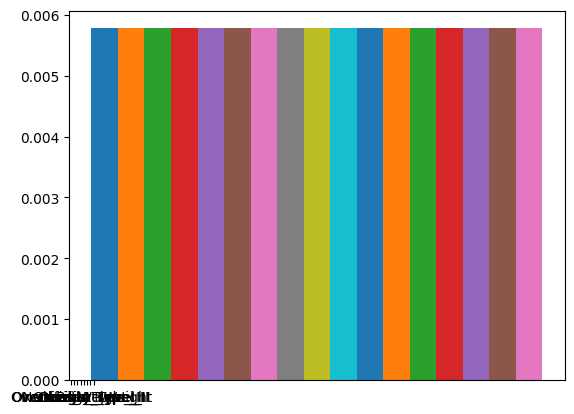

In [38]:
plt.hist(ap,bins=1,density=True,alpha=1)
plt.show()

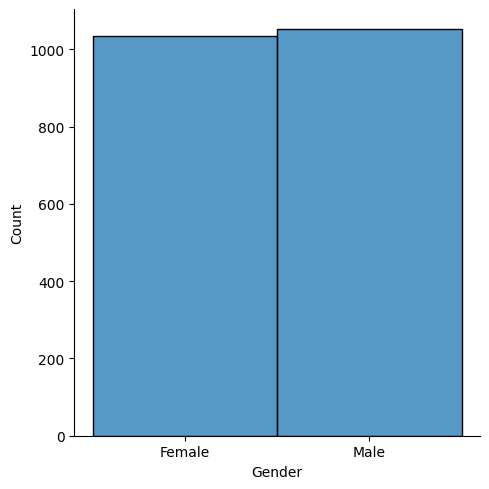

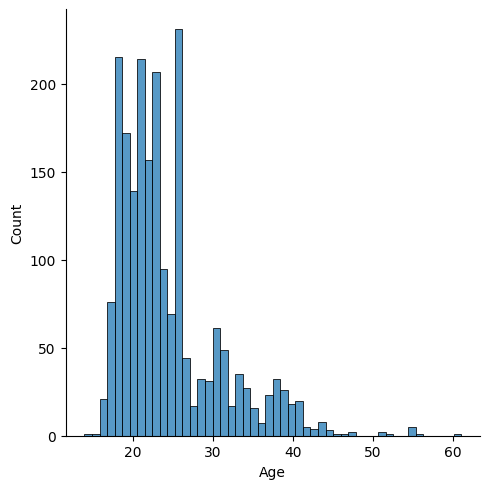

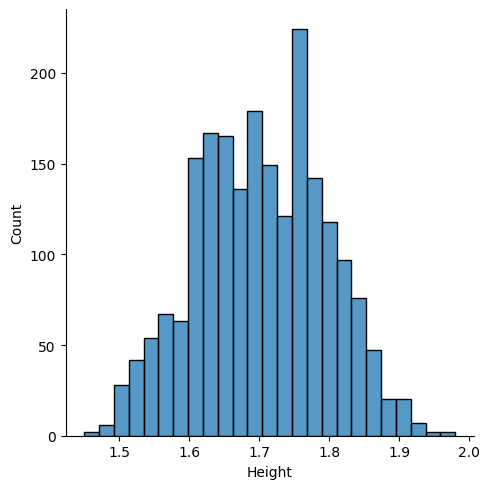

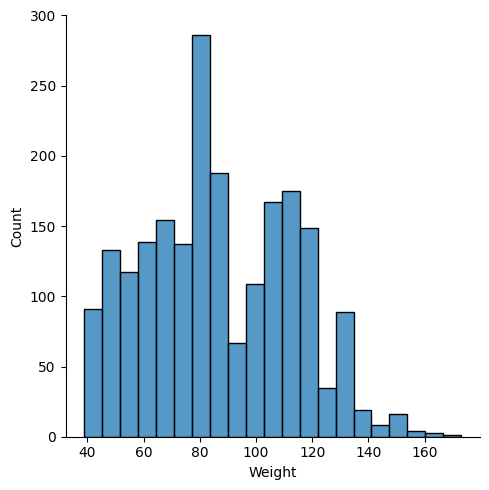

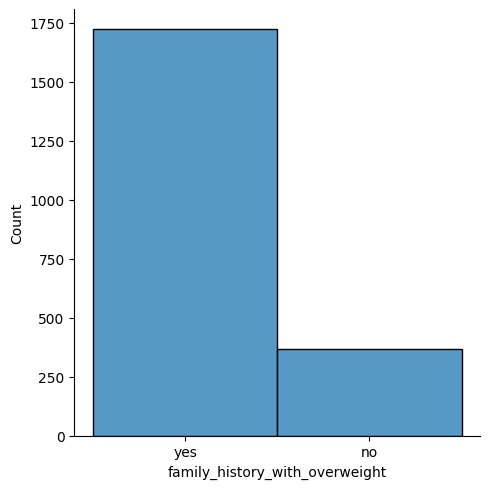

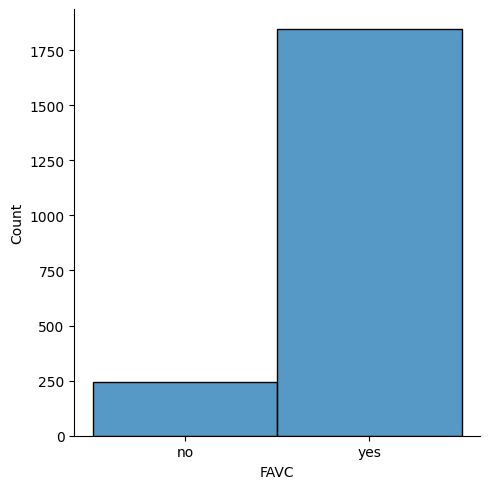

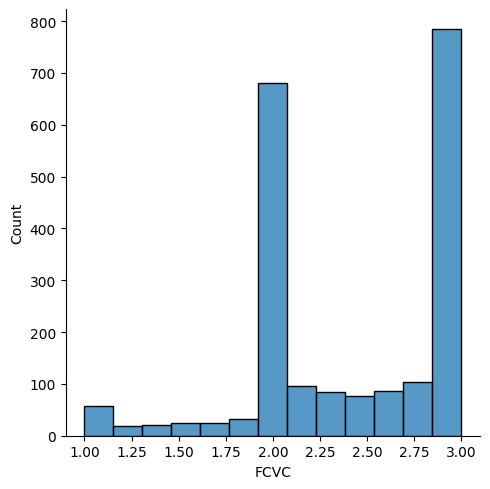

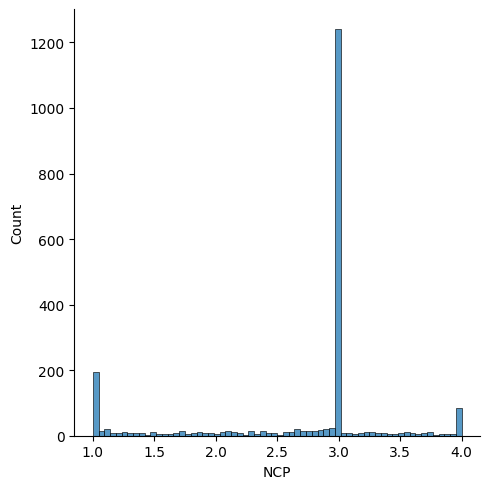

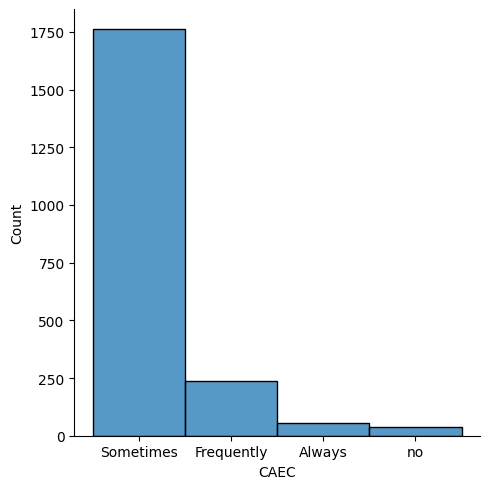

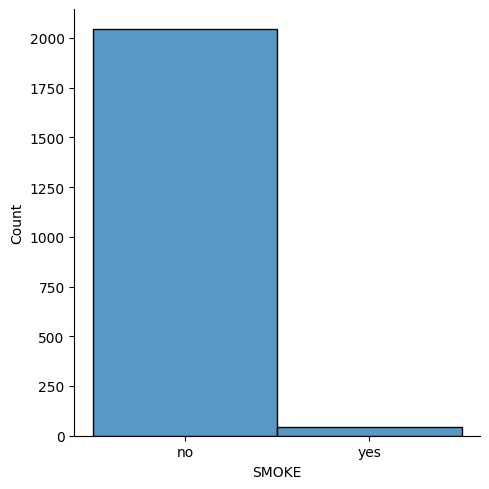

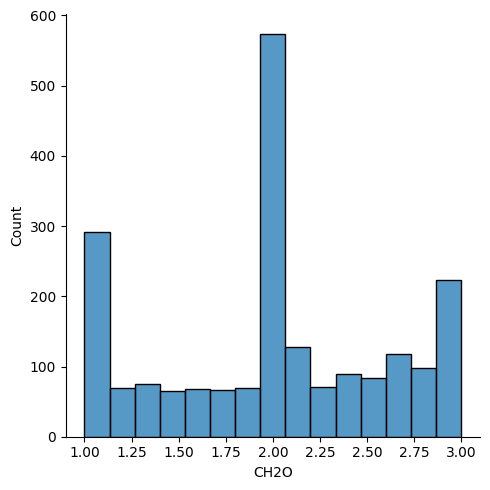

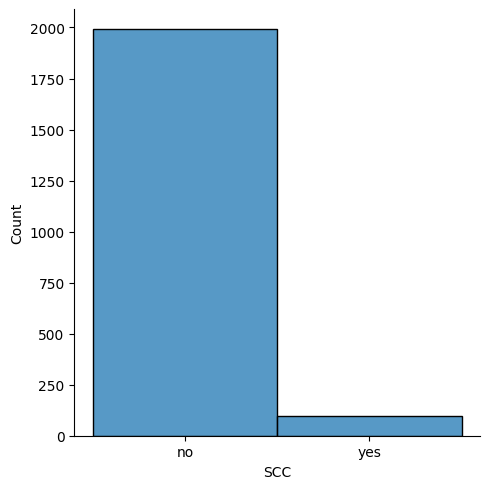

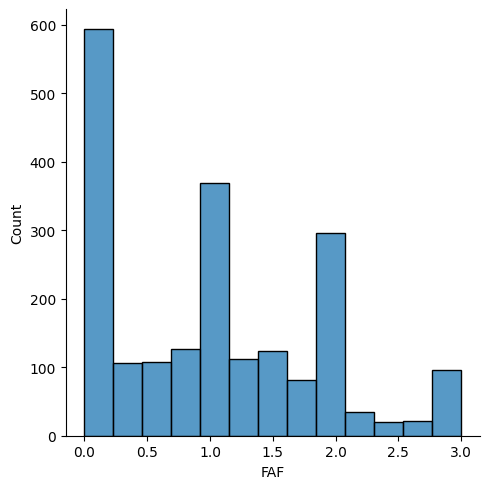

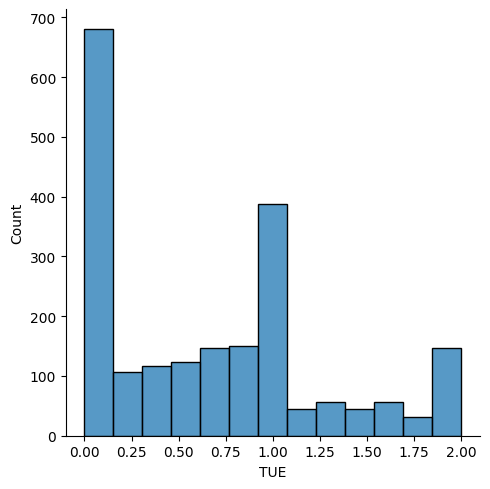

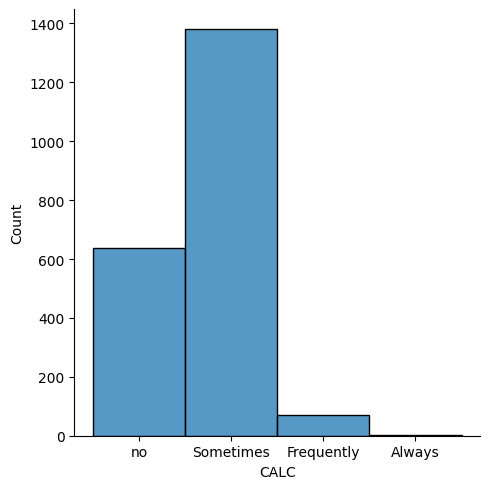

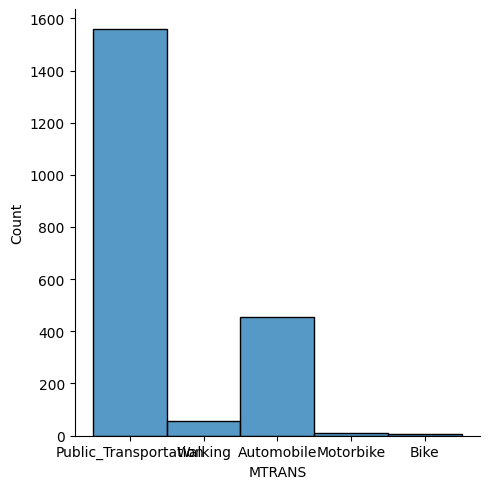

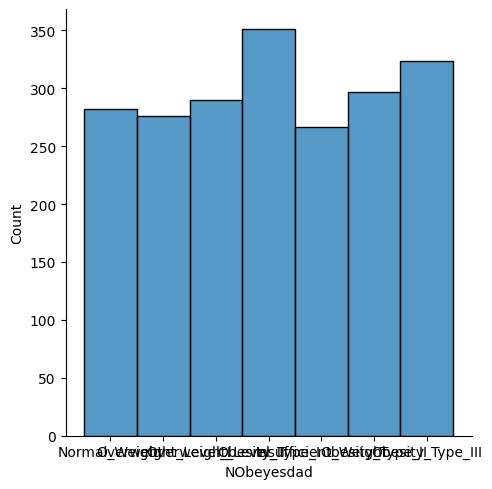

In [39]:
for columns in ap:
 sns.displot(x=columns,data=ap)

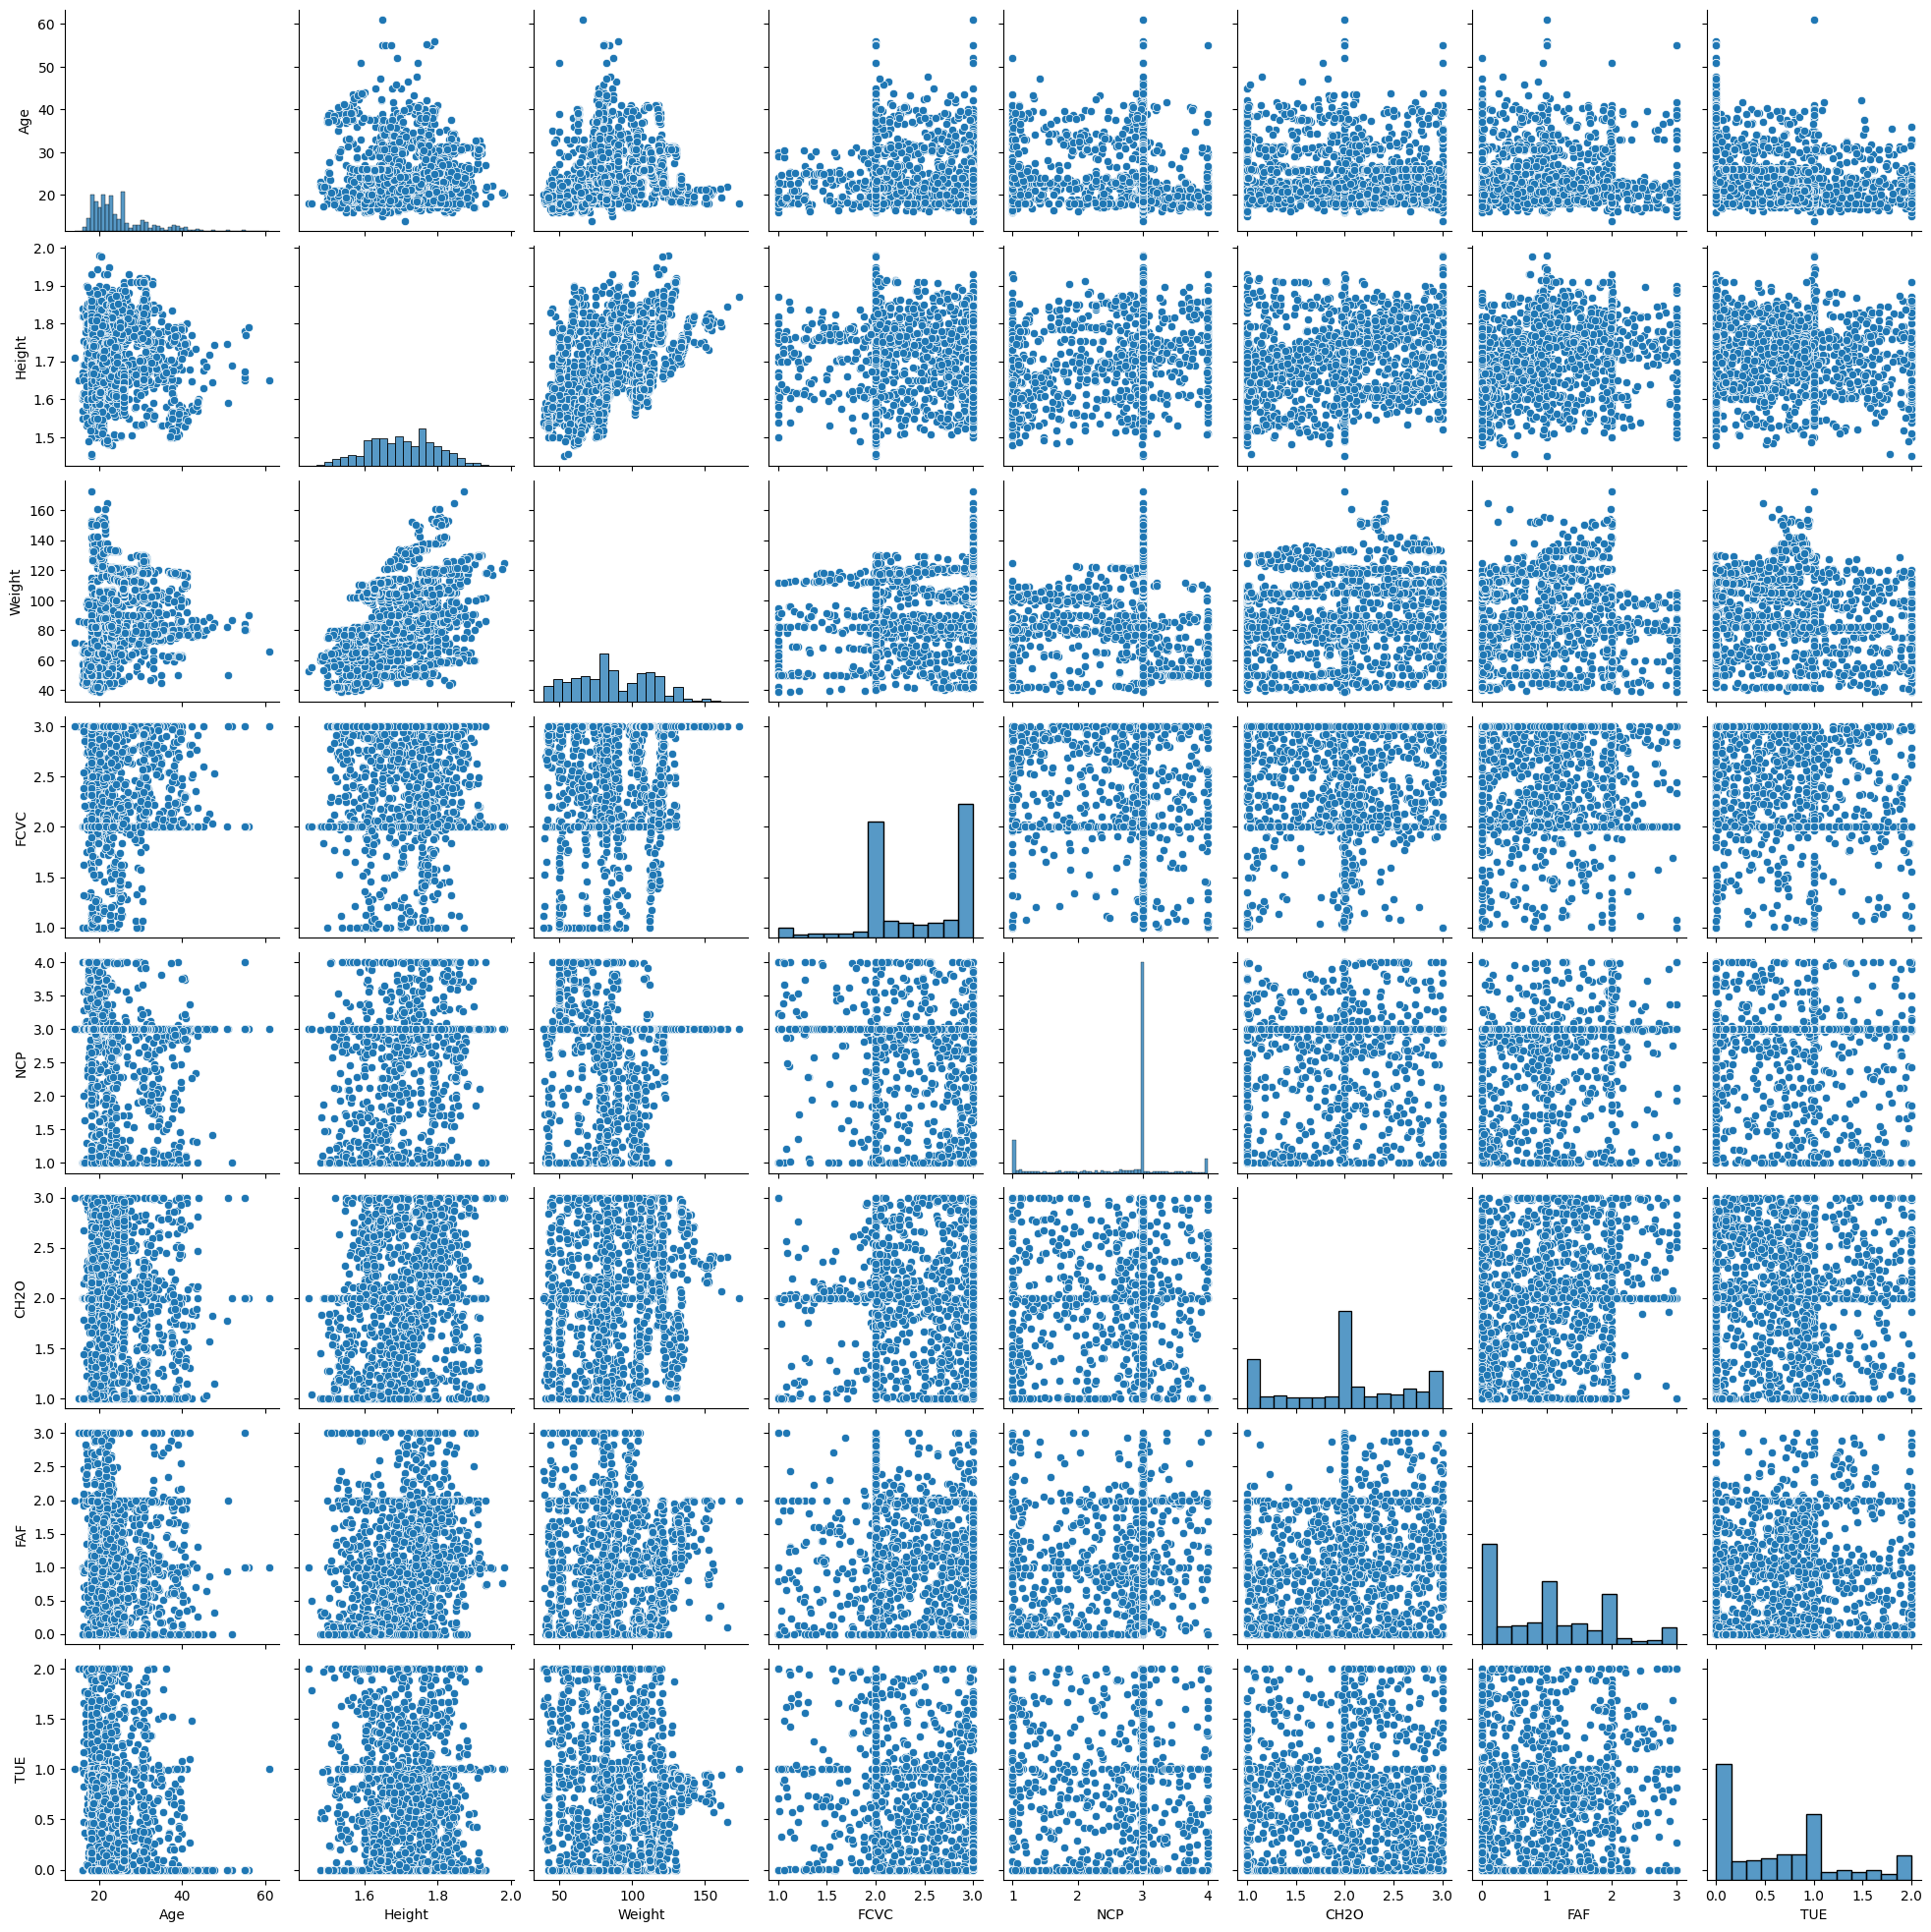

In [40]:
sns.pairplot(ap)

In [41]:
# correlation=ap.corr()

# Univariate Analysis

In [42]:
ap['NObeyesdad'].value_counts(normalize='True')

NObeyesdad
Obesity_Type_I         0.168184
Obesity_Type_III       0.155247
Obesity_Type_II        0.142310
Overweight_Level_II    0.138955
Normal_Weight          0.135122
Overweight_Level_I     0.132247
Insufficient_Weight    0.127935
Name: proportion, dtype: float64

<Axes: xlabel='NObeyesdad'>

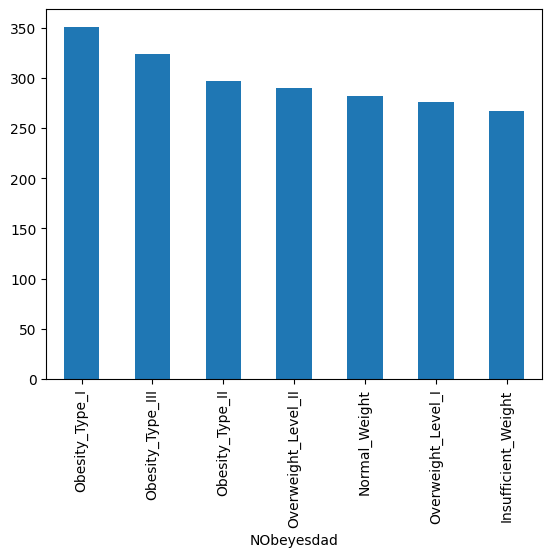

In [43]:
ap['NObeyesdad'].value_counts().plot.bar()

<Axes: xlabel='NObeyesdad'>

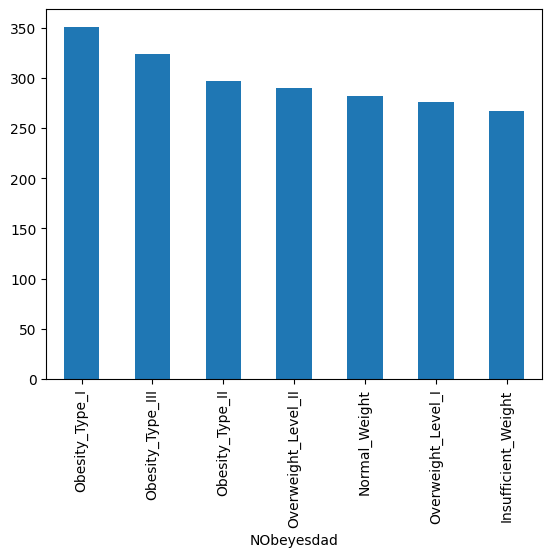

In [44]:
ap['NObeyesdad'].value_counts().plot.bar()

<Axes: xlabel='NObeyesdad'>

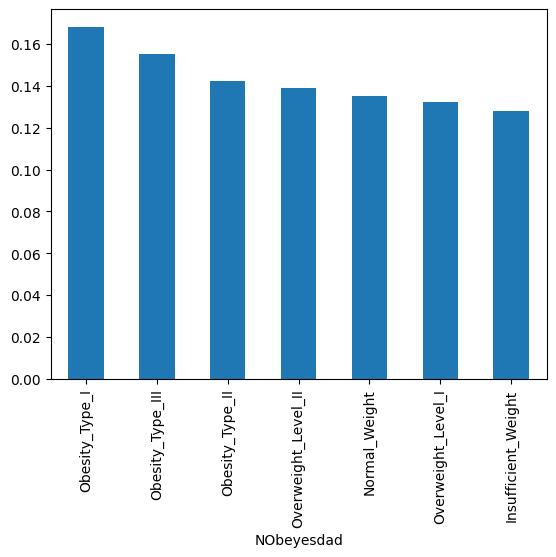

In [45]:
ap['NObeyesdad'].value_counts(normalize='True').plot.bar()

<Axes: xlabel='NObeyesdad', ylabel='count'>

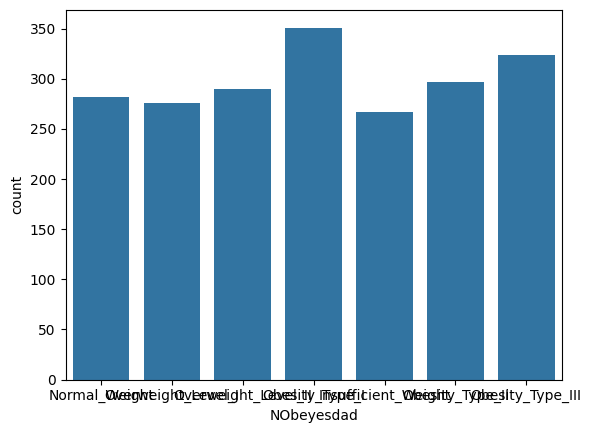

In [46]:
sns.countplot(x='NObeyesdad',data=ap)

# Independent Variable (Categorical)

In [47]:
#using matplotlib

# plt.figure(1)
# plt.subplot(221)
# ap['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color='Steelblue')
# plt.subplot(222)
# ap['family_history_with_overweight'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Family History',color='Steelblue')
# plt.subplot(223)
# ap['FAVC'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='FAVC',color='Steelblue')
# plt.subplot(224)
# ap['CAEC'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='CAEC',color='Steelblue')
# plt.subplot(225)
# ap['SMOKE'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='SMOKE',color='Steelblue')
# plt.subplot(226)
# ap['SCC'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='SCC',color='Steelblue')
# plt.subplot(227)
# ap['CALC'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='CALC',color='Steelblue')
# plt.subplot(228)
# ap['MTRANS'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='MTRANS',color='Steelblue')



### using seaborn

<Axes: xlabel='MTRANS', ylabel='count'>

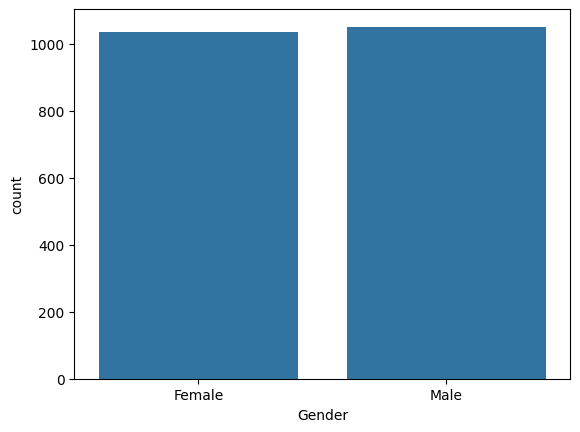

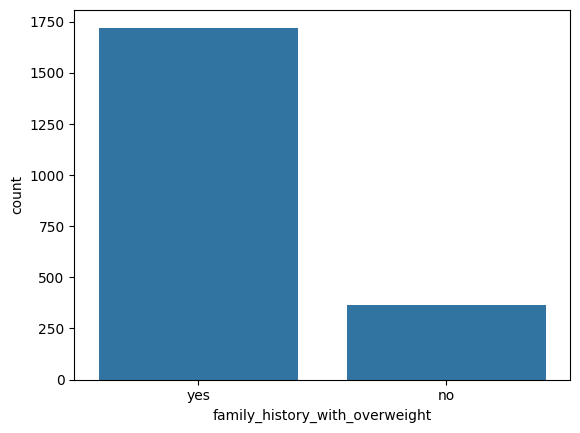

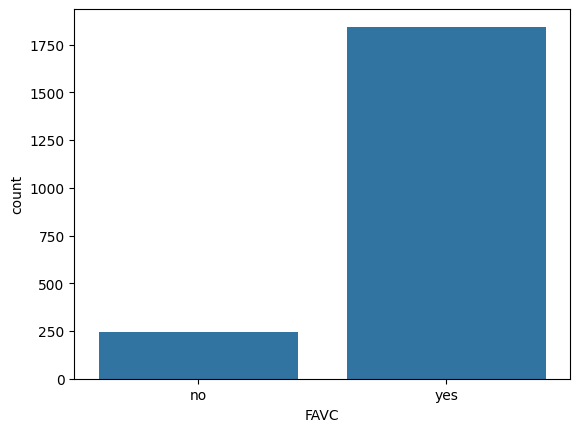

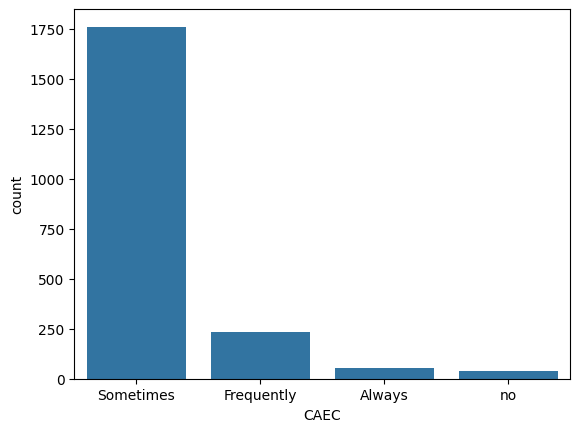

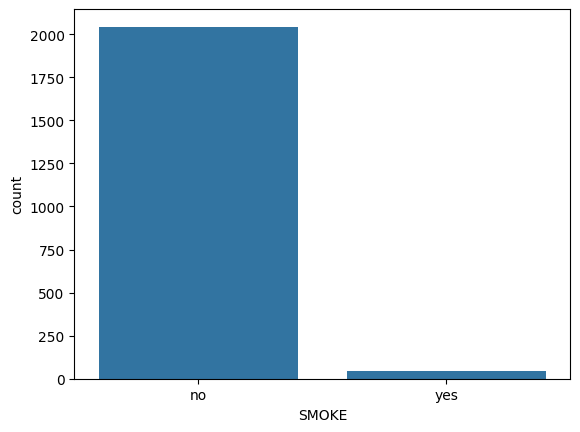

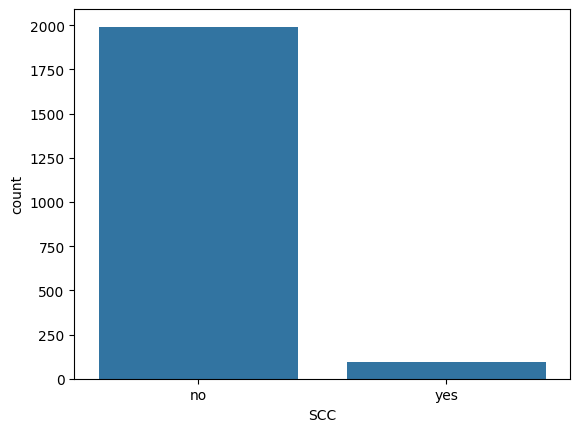

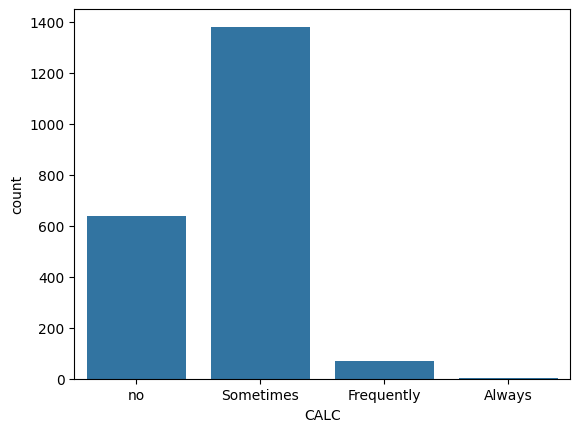

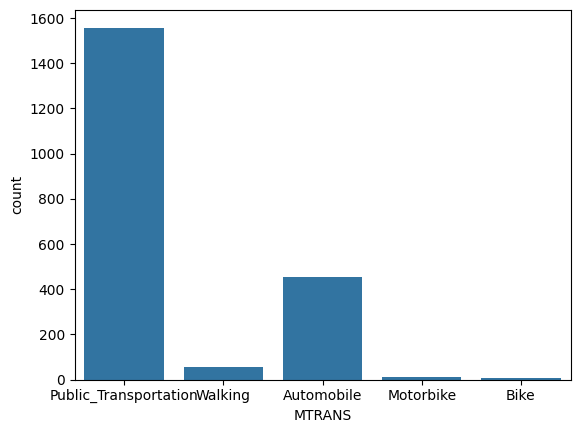

In [48]:
plt.figure(1)
plt.subplot(111)
sns.countplot(x='Gender',data=ap)
plt.figure(2)
plt.subplot(111)
sns.countplot(x='family_history_with_overweight',data=ap)
plt.figure(3)
plt.subplot(111)
sns.countplot(x='FAVC',data=ap)
plt.figure(4)
plt.subplot(111)
sns.countplot(x='CAEC',data=ap)
plt.figure(5)
plt.subplot(111)
sns.countplot(x='SMOKE',data=ap)
plt.figure(6)
plt.subplot(111)
sns.countplot(x='SCC',data=ap)
plt.figure(7)
plt.subplot(111)
sns.countplot(x='CALC',data=ap)
plt.figure(8)
plt.subplot(111)
sns.countplot(x='MTRANS',data=ap)

## Bivariate Analysis

## continuous vs Categorical

<Axes: xlabel='NObeyesdad', ylabel='Age'>

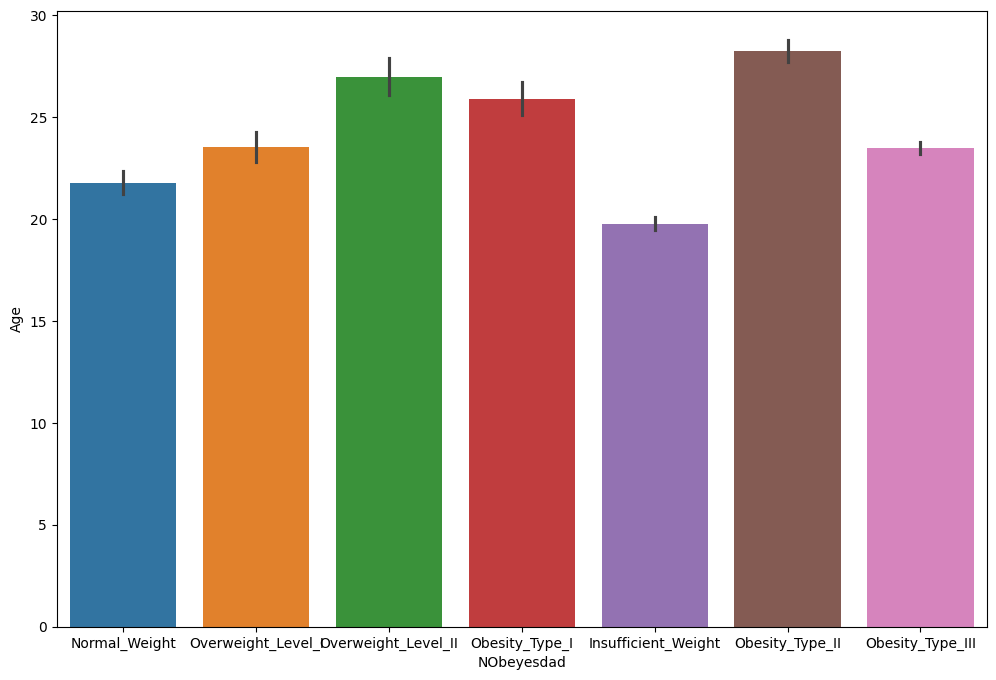

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Age',x='NObeyesdad',hue='NObeyesdad')

In [50]:
ap.groupby(['Age', 'NObeyesdad']).size()

Age        NObeyesdad         
14.000000  Normal_Weight          1
15.000000  Obesity_Type_I         1
16.000000  Insufficient_Weight    2
           Normal_Weight          5
           Overweight_Level_I     1
                                 ..
55.022494  Overweight_Level_II    1
55.137881  Overweight_Level_II    1
55.246250  Overweight_Level_II    1
56.000000  Overweight_Level_II    1
61.000000  Normal_Weight          1
Length: 1483, dtype: int64

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

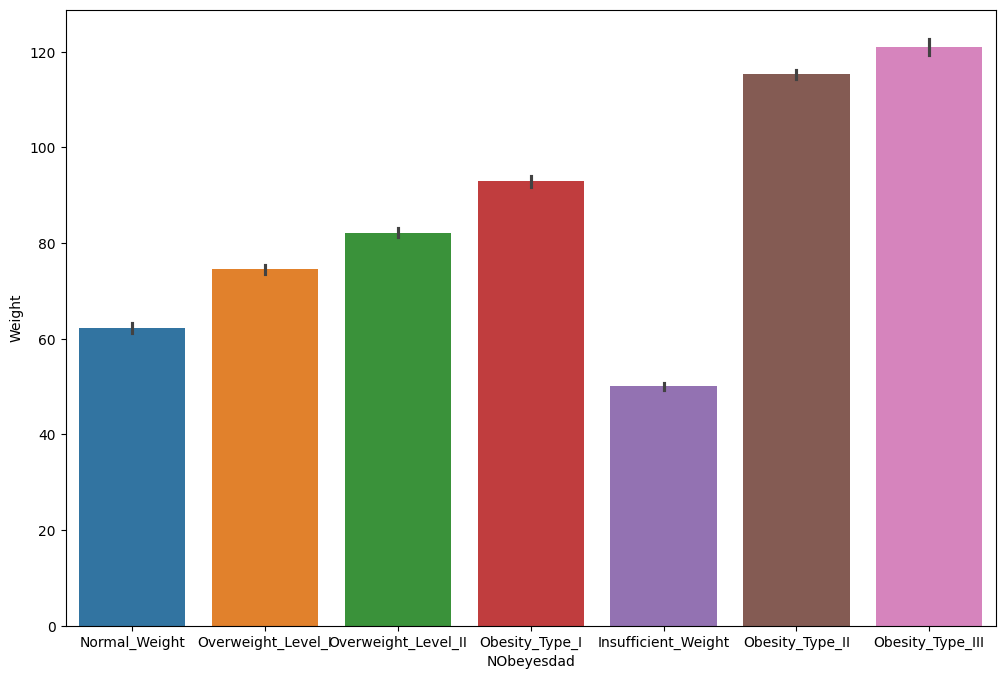

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Weight',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Height'>

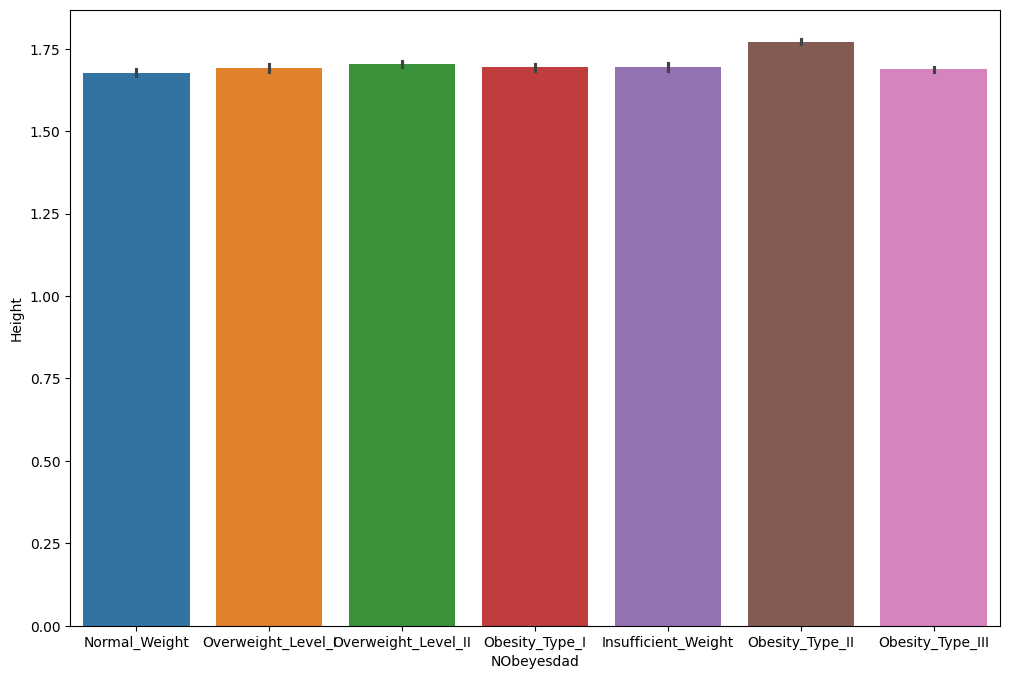

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Height',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='FCVC'>

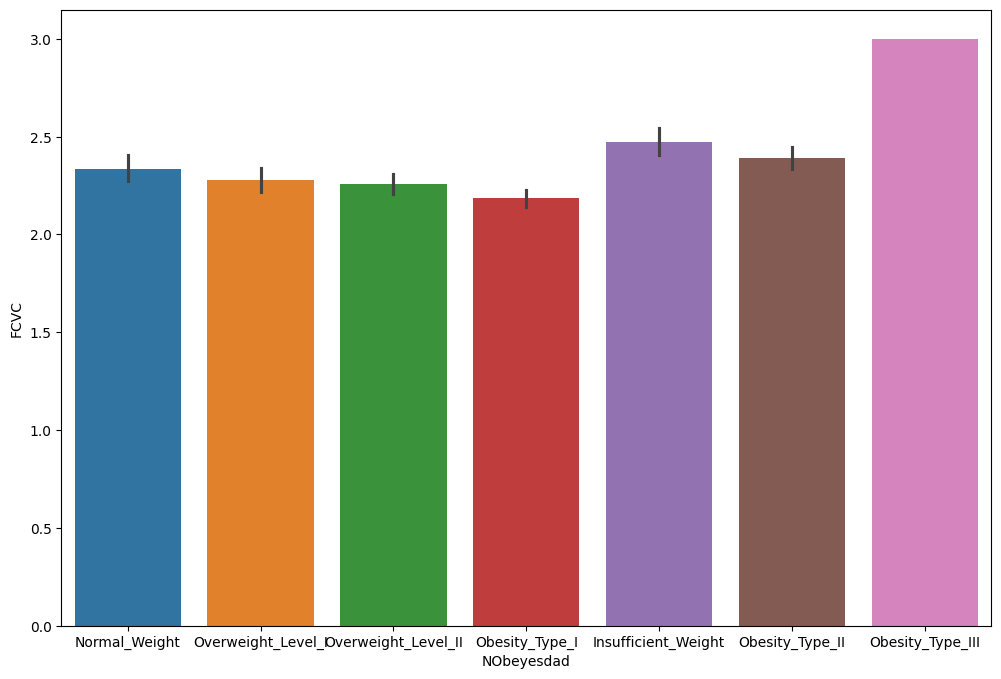

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='FCVC',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='NCP'>

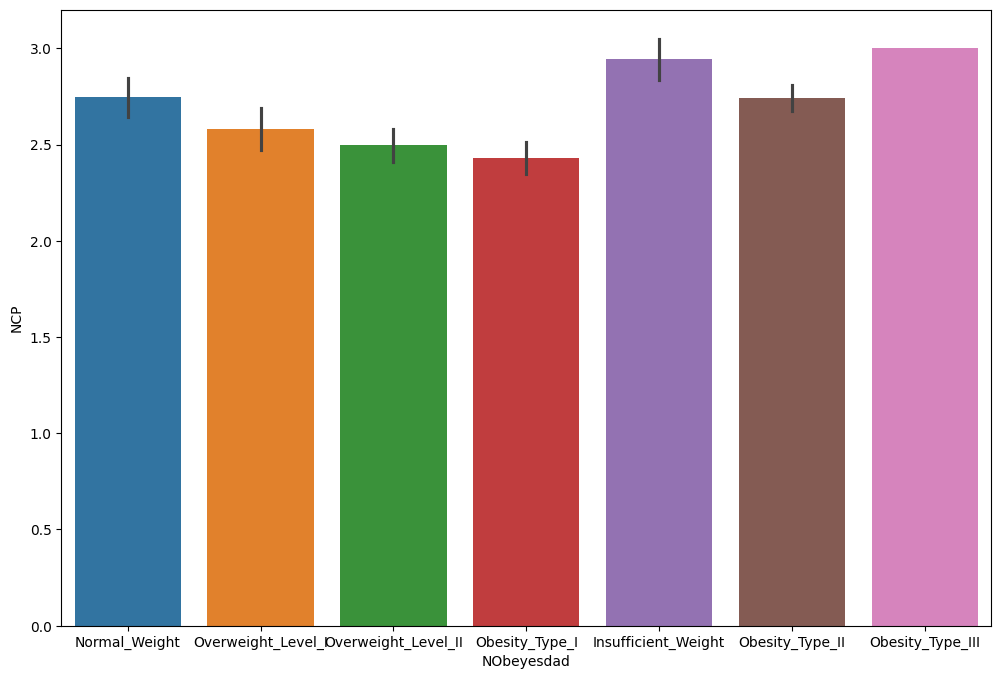

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='NCP',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='CH2O'>

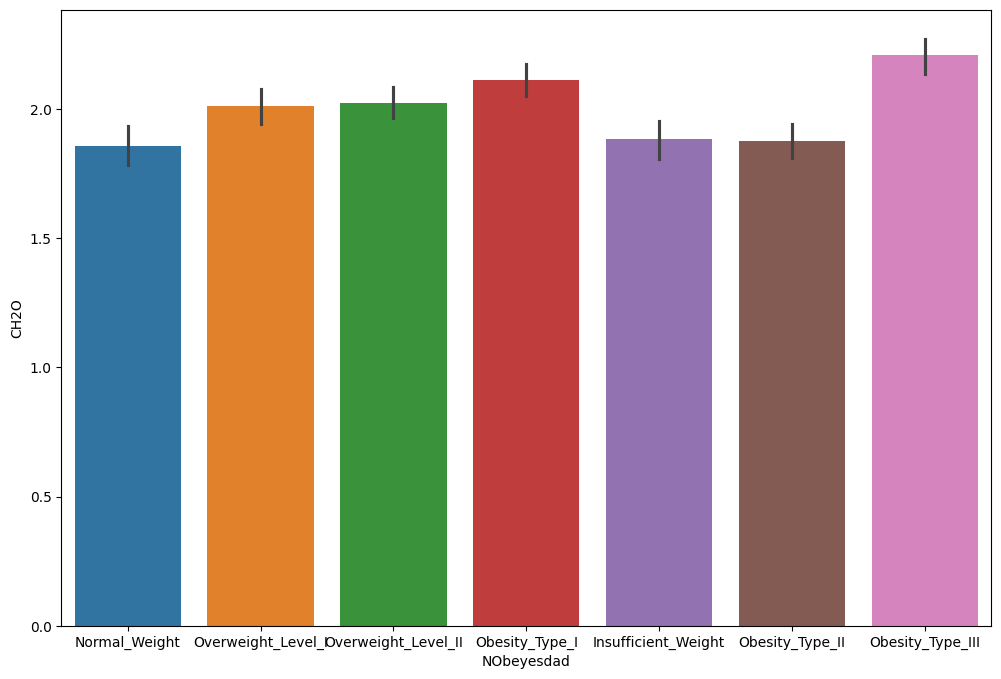

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='CH2O',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

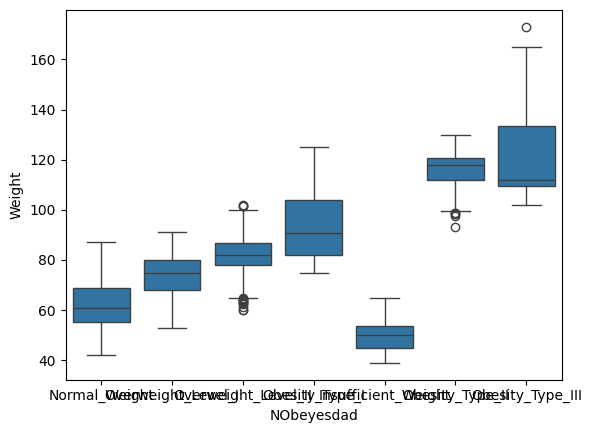

In [56]:
sns.boxplot(data=ap,y='Weight',x='NObeyesdad')

## categorical vs Categorical

<Axes: xlabel='Gender', ylabel='count'>

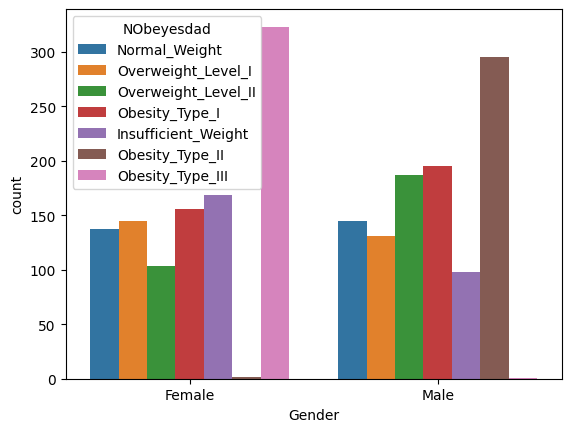

In [57]:
sns.countplot(data=ap,x='Gender',hue='NObeyesdad')
#if we want to stack this then we have to use crosstab and heatmap

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

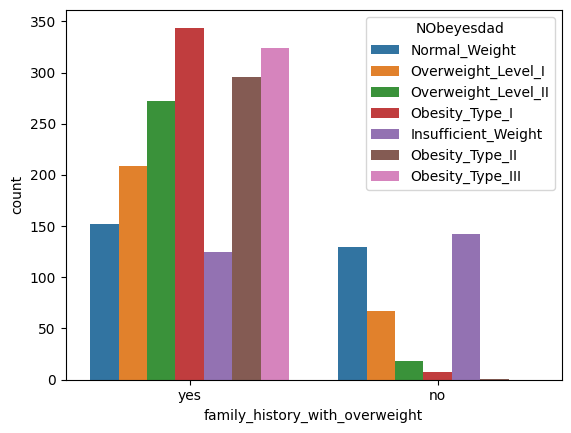

In [58]:
sns.countplot(data=ap,x='family_history_with_overweight',hue='NObeyesdad')

<Axes: xlabel='FAVC', ylabel='count'>

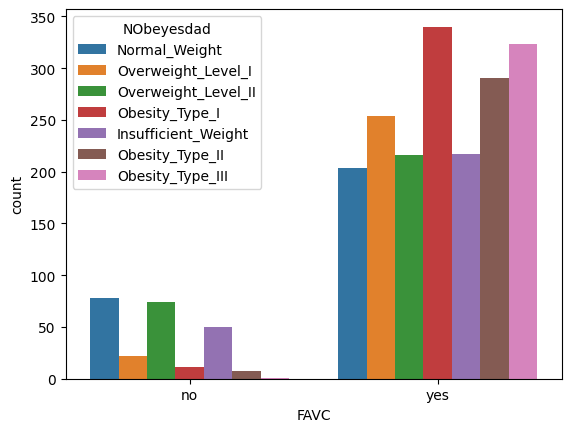

In [59]:
sns.countplot(data=ap,x='FAVC',hue='NObeyesdad')

<Axes: xlabel='CAEC', ylabel='count'>

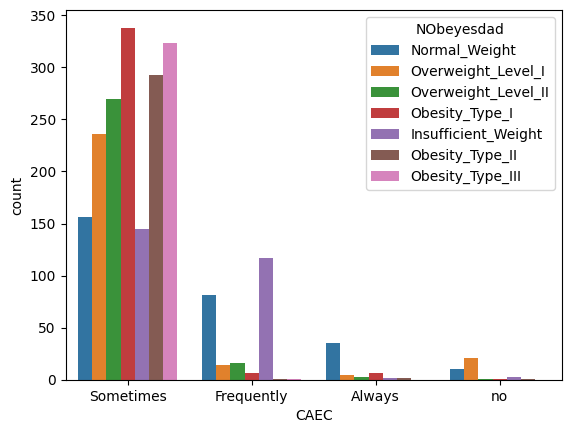

In [60]:
sns.countplot(data=ap,x='CAEC',hue='NObeyesdad')

<Axes: xlabel='SMOKE', ylabel='count'>

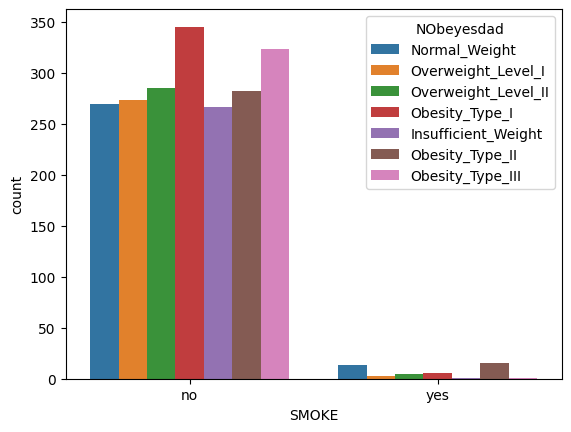

In [61]:
sns.countplot(data=ap,x='SMOKE',hue='NObeyesdad')

<Axes: xlabel='SCC', ylabel='count'>

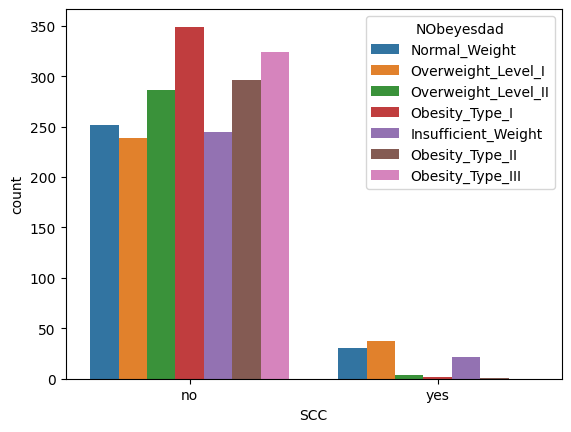

In [62]:
sns.countplot(data=ap,x='SCC',hue='NObeyesdad')

<Axes: xlabel='CALC', ylabel='count'>

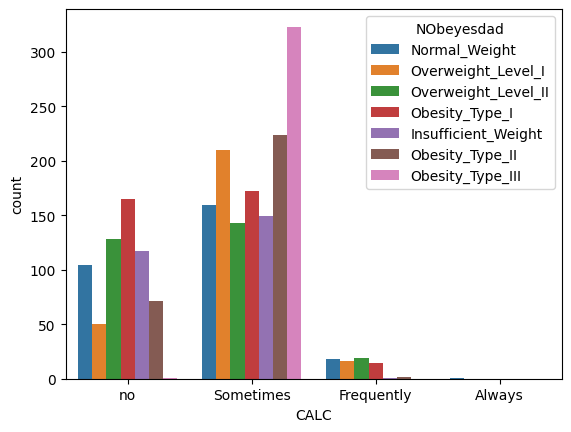

In [63]:
sns.countplot(data=ap,x='CALC',hue='NObeyesdad')

<Axes: xlabel='MTRANS', ylabel='count'>

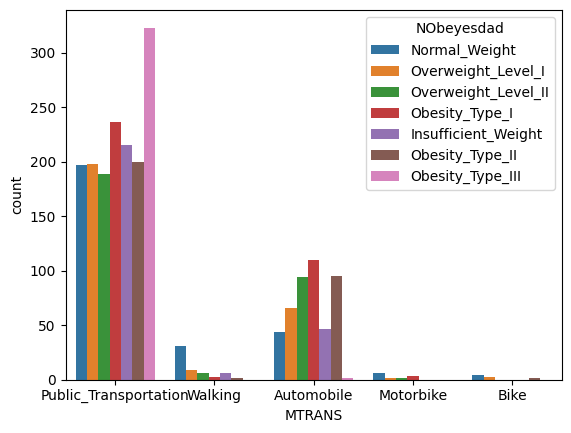

In [64]:
sns.countplot(data=ap,x='MTRANS',hue='NObeyesdad')

#### people using public transport are more likely to be obesed

## Bivariate anaylsis using cross tab,groupby,& stack

#### Categorical independent variable v/s Target

<Axes: xlabel='Gender'>

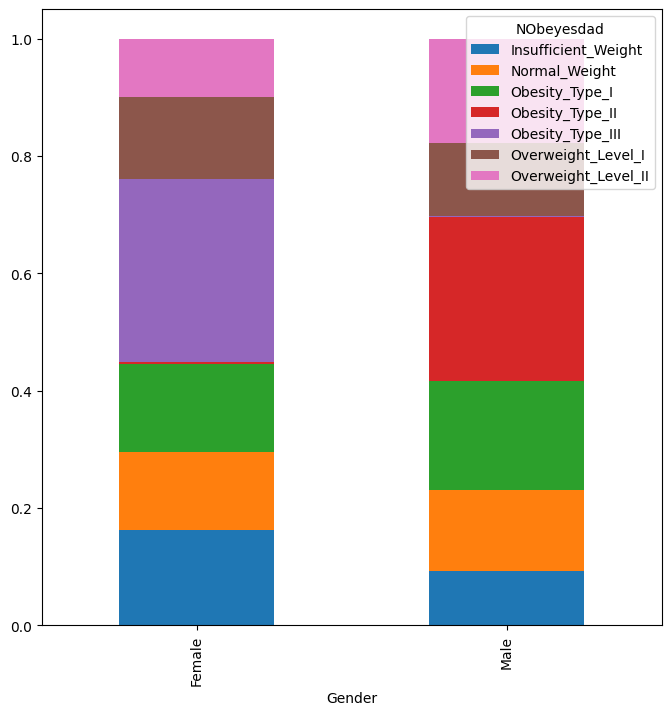

In [65]:
Gender=pd.crosstab(ap['Gender'],ap['NObeyesdad'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

<Axes: xlabel='family_history_with_overweight'>

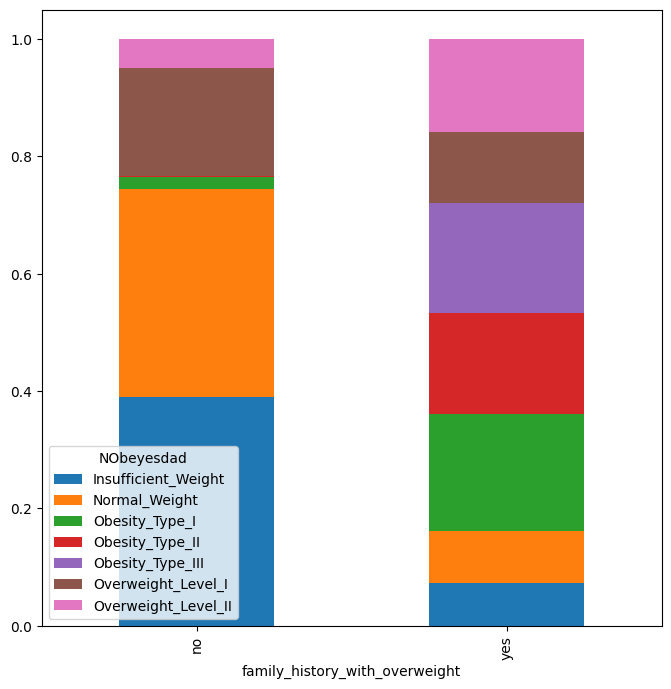

In [66]:
Family=pd.crosstab(ap['family_history_with_overweight'],ap['NObeyesdad'])
Family.div(Family.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

<Axes: xlabel='family_history_with_overweight'>

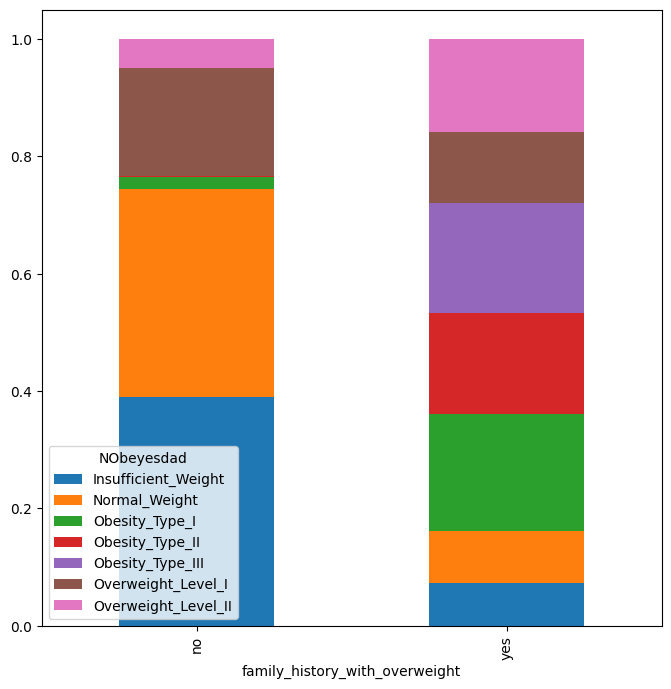

In [67]:
CAEC=pd.crosstab(ap['family_history_with_overweight'],ap['NObeyesdad'])
CAEC.div(CAEC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

<Axes: xlabel='CALC'>

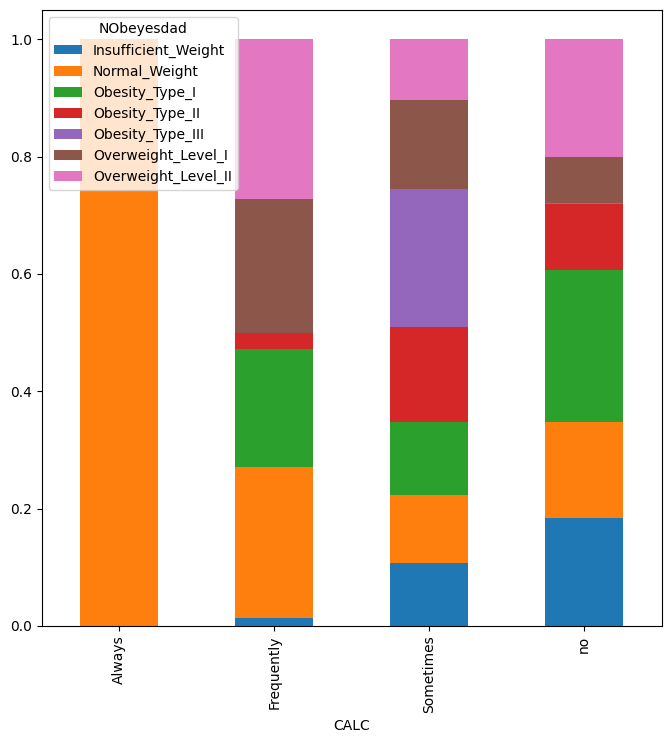

In [68]:
CALC=pd.crosstab(ap['CALC'],ap['NObeyesdad'])
CALC.div(CALC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

<Axes: xlabel='MTRANS'>

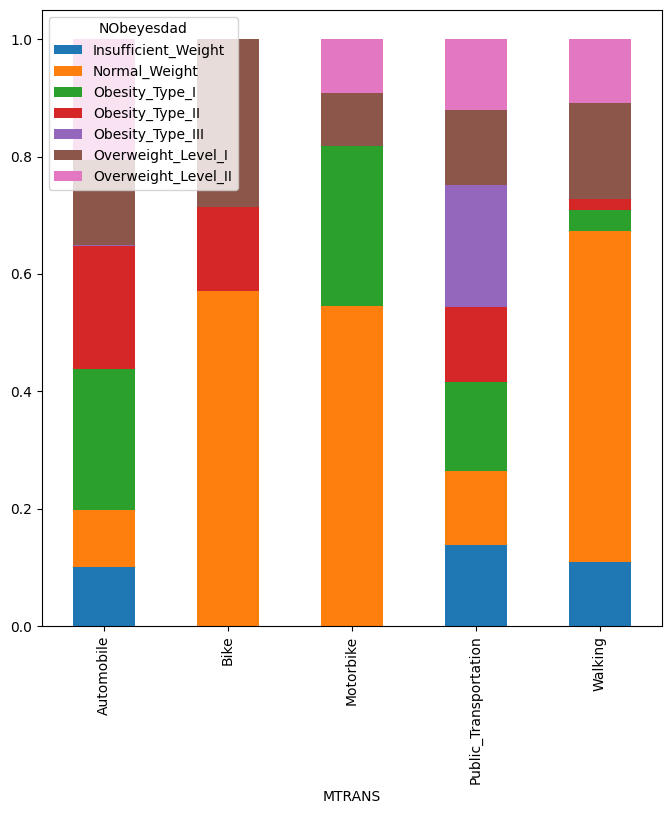

In [69]:
Transport=pd.crosstab(ap['MTRANS'],ap['NObeyesdad'])
Transport.div(Transport.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))

### Numerical Independent Variable v/s Target
#### will try to find the mean age, height and weight of people for which the categories of obesity level are found 

In [70]:
ap.groupby('NObeyesdad')['Age'].mean()


NObeyesdad
Insufficient_Weight    19.771687
Normal_Weight          21.758865
Obesity_Type_I         25.884941
Obesity_Type_II        28.233785
Obesity_Type_III       23.495554
Overweight_Level_I     23.540309
Overweight_Level_II    26.996981
Name: Age, dtype: float64

<Axes: xlabel='NObeyesdad'>

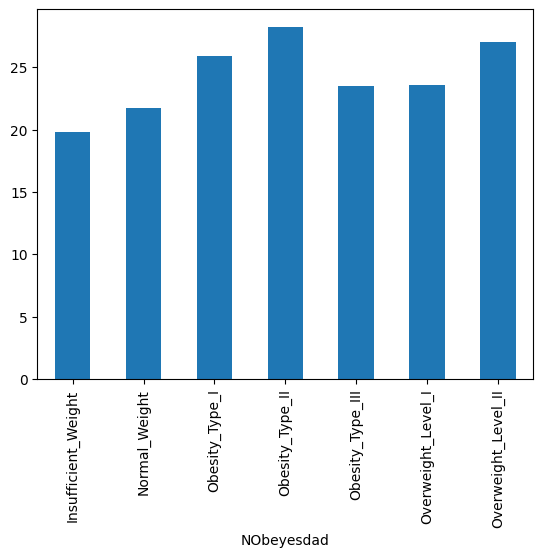

In [71]:
ap.groupby('NObeyesdad')['Age'].mean().plot.bar()

<Axes: xlabel='NObeyesdad'>

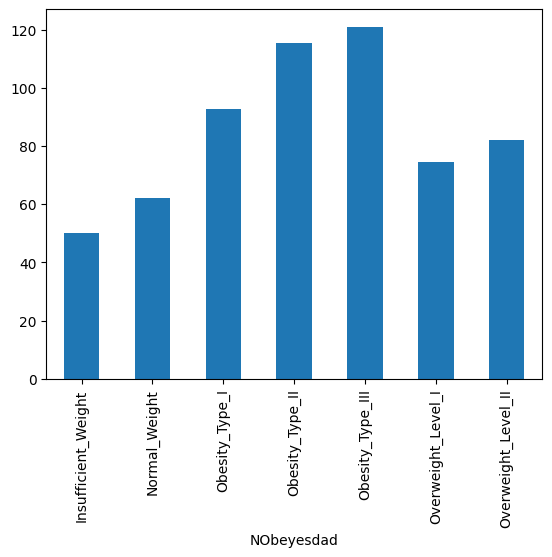

In [72]:
ap.groupby('NObeyesdad')['Weight'].mean().plot.bar()

<Axes: xlabel='NObeyesdad'>

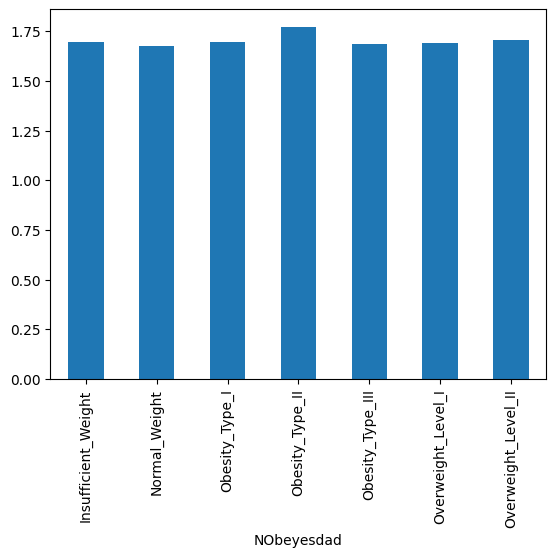

In [73]:
ap.groupby('NObeyesdad')['Height'].mean().plot.bar()

In [74]:
ap.shape


(2087, 17)

In [75]:
ap.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

# Data Encoding

In [76]:
ap['Gender'].value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [77]:
label_encode=LabelEncoder()
bbb=label_encode.fit_transform(ap['Gender'])
print(bbb)
ap['Gender']=bbb


[0 0 1 ... 0 0 0]


In [78]:
ap['Gender'].value_counts()

Gender
1    1052
0    1035
Name: count, dtype: int64

In [79]:
ap['family_history_with_overweight'].value_counts()


family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

In [80]:
bbb=label_encode.fit_transform(ap['family_history_with_overweight'])
print(bbb)
ap['family_history_with_overweight']=bbb
ap['family_history_with_overweight'].value_counts()


[1 1 1 ... 1 1 1]


family_history_with_overweight
1    1722
0     365
Name: count, dtype: int64

In [81]:
ap['FAVC'].value_counts()

FAVC
yes    1844
no      243
Name: count, dtype: int64

In [82]:
bbb=label_encode.fit_transform(ap['FAVC'])
print(bbb)
ap['FAVC']=bbb
ap['FAVC'].value_counts()

[0 0 0 ... 1 1 1]


FAVC
1    1844
0     243
Name: count, dtype: int64

In [83]:
ap['CAEC'].value_counts()

CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

In [84]:
bbb=label_encode.fit_transform(ap['CAEC'])
print(bbb)
ap['CAEC']=bbb
ap['CAEC'].value_counts()

[2 2 2 ... 2 2 2]


CAEC
2    1761
1     236
0      53
3      37
Name: count, dtype: int64

In [85]:
ap['SMOKE'].value_counts()

SMOKE
no     2043
yes      44
Name: count, dtype: int64

In [86]:
bbb=label_encode.fit_transform(ap['SMOKE'])
print(bbb)
ap['SMOKE']=bbb
ap['SMOKE'].value_counts()

[0 1 0 ... 0 0 0]


SMOKE
0    2043
1      44
Name: count, dtype: int64

In [87]:
ap['SCC'].value_counts()

SCC
no     1991
yes      96
Name: count, dtype: int64

In [88]:
bbb=label_encode.fit_transform(ap['SCC'])
print(bbb)
ap['SCC']=bbb
ap['SCC'].value_counts()

[0 1 0 ... 0 0 0]


SCC
0    1991
1      96
Name: count, dtype: int64

In [89]:
ap['CALC'].value_counts()

CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

In [90]:
bbb=label_encode.fit_transform(ap['CALC'])
print(bbb)
ap['CALC']=bbb
ap['CALC'].value_counts()

[3 2 1 ... 2 2 2]


CALC
2    1380
3     636
1      70
0       1
Name: count, dtype: int64

In [91]:
ap['MTRANS'].value_counts()

MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [92]:
bbb=label_encode.fit_transform(ap['MTRANS'])
print(bbb)
ap['MTRANS']=bbb
ap['MTRANS'].value_counts()

[3 3 3 ... 3 3 3]


MTRANS
3    1558
0     456
4      55
2      11
1       7
Name: count, dtype: int64

In [93]:
ap['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [94]:
bbb=label_encode.fit_transform(ap['NObeyesdad'])
print(bbb)
ap['NObeyesdad']=bbb
ap['NObeyesdad'].value_counts()

[1 1 1 ... 4 4 4]


NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

<Axes: >

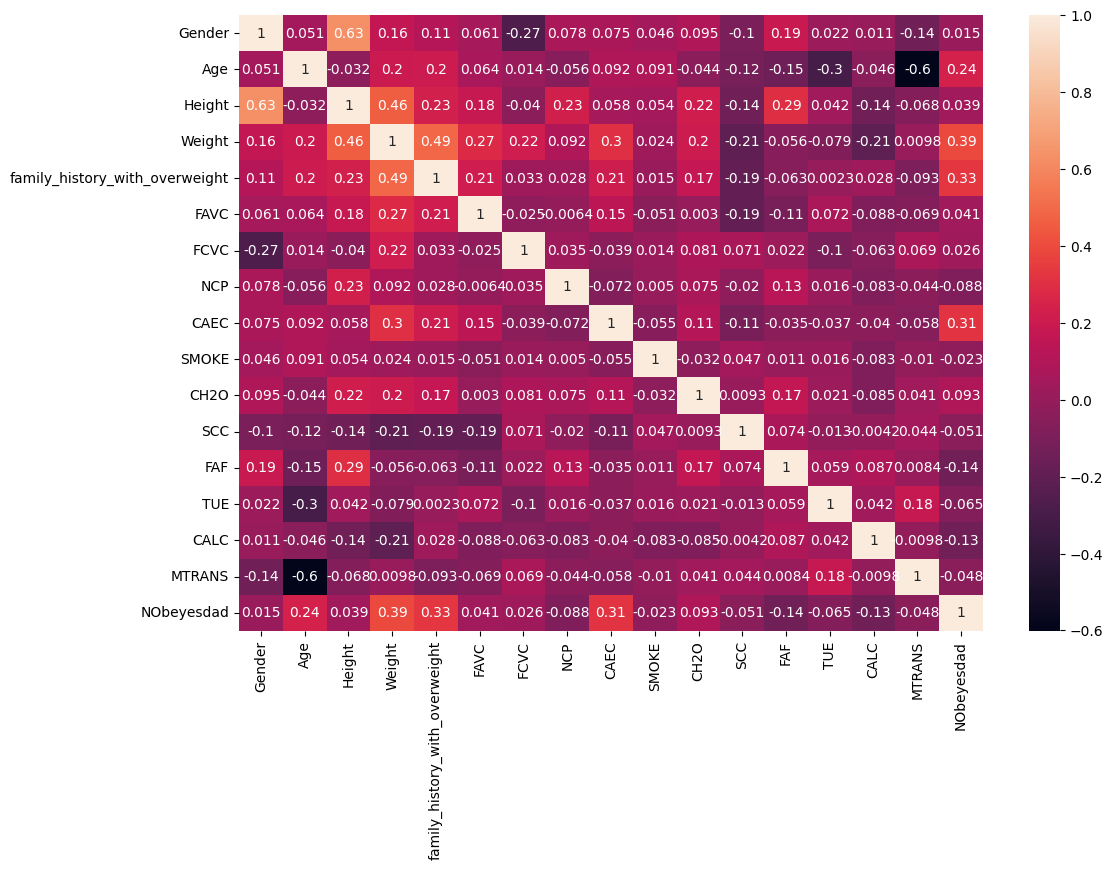

In [95]:
plt.figure(figsize=(12,8))
sns.heatmap(ap.corr(),annot=True)

In [96]:
X=ap.drop('NObeyesdad',axis=1)

In [97]:
Y=ap['NObeyesdad']

In [98]:
X


Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3   
1        0   3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2   
2        0   2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1   
3        0   3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1   
4        0   2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2   
2107     1   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2   
2108     1   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2   
2109     1   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2   
2110     1   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2   

      MTRANS  
0          3  
1          3  
2          3  
3          4  
4          3  
...      ...  
2106       3  
2107       3  
2108       3  
2109       3  
2110       3  

[2087 rows x 16 columns]

In [99]:
Y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2087, dtype: int32

## Standardization and Normalization

In [100]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [101]:
Xs

array([[0.        , 0.14893617, 0.32075472, ..., 0.5       , 1.        ,
        0.75      ],
       [0.        , 0.14893617, 0.13207547, ..., 0.        , 0.66666667,
        0.75      ],
       [1.        , 0.19148936, 0.66037736, ..., 0.5       , 0.33333333,
        0.75      ],
       ...,
       [0.        , 0.18136247, 0.5702    , ..., 0.323144  , 0.66666667,
        0.75      ],
       [0.        , 0.22046672, 0.54613208, ..., 0.2930175 , 0.66666667,
        0.75      ],
       [0.        , 0.20563211, 0.54497358, ..., 0.3570685 , 0.66666667,
        0.75      ]])

#### cross validation

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.2,random_state=42,stratify=Y)

In [103]:
X.shape,X_train.shape,X_test.shape

((2087, 16), (1669, 16), (418, 16))

In [104]:
Y.shape,Y_train.shape,Y_test.shape

((2087,), (1669,), (418,))

# Model Selection

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.8999
testingAccuracy: 0.8947


Logistic Regression:
trainAccuracy: 0.7364
testingAccuracy: 0.7249


Naive Bayes:
trainAccuracy: 0.5914
testingAccuracy: 0.5981




C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine:
trainAccuracy: 0.8574
testingAccuracy: 0.8182


K-Nearest Neighbors:
trainAccuracy: 0.8364
testingAccuracy: 0.7632


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9426


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9569


Bagging:
trainAccuracy: 0.9940
testingAccuracy: 0.9498


AdaBoost:
trainAccuracy: 0.3523
testingAccuracy: 0.3469


Gradient Boosting:
trainAccuracy: 0.9994
testingAccuracy: 0.9713


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.7943




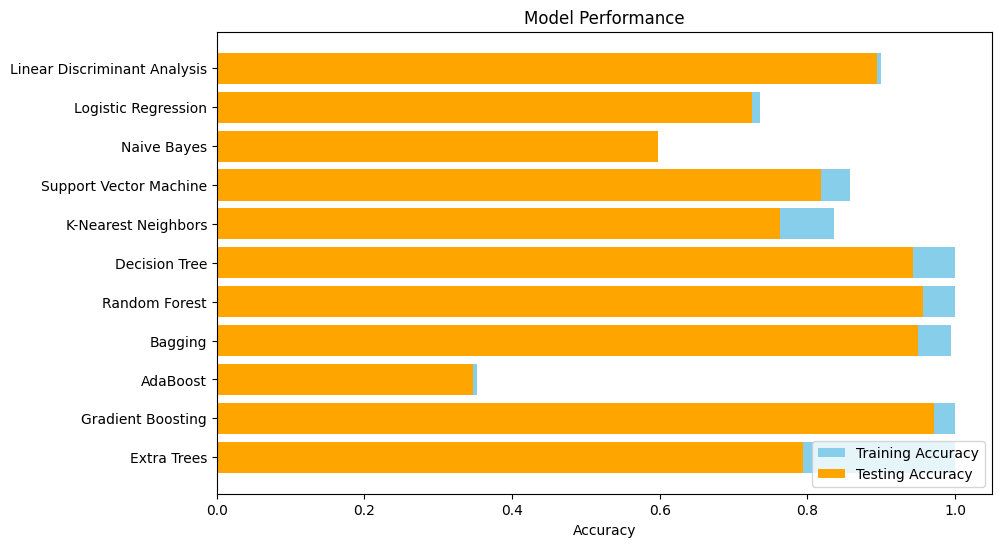

In [105]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score

# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()

# print("TRAINING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     X_train_prediction = model.predict(X_train)
#     trainacc = accuracy_score( X_train_prediction, Y_train)
#     print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
# #for testing  data  
# print("TESTING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     testacc = accuracy_score(Y_test, y_pred)
#     print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

# Create a DataFrame for plotting
# data = pd.DataFrame({'Model': models,
#                      'Train Accuracy': trainacc,
#                      'Test Accuracy': testacc})

# # Plotting the results using Seaborn
# plt.figure(figsize=(10, 8))
# sns.barplot(data=data.melt(id_vars='Model'), x='value', y='Model', hue='variable', palette='muted', orient='h')
# plt.xlabel('Accuracy')
# plt.title('Model Performance')
# plt.legend(title=None)
# # plt.gca().invert_yaxis()
# plt.xticks(rotation=45, ha='right')
# # Invert y-axis to display the models in descending order
# plt.show()

In [106]:
#The best testing accuracy is provided by Gradient Boosting
model=GradientBoostingClassifier()

In [107]:
GBC=model.fit(X_train,Y_train)

In [108]:
X_train_prediction=GBC.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)
training_accuracy

0.9994008388256441

In [109]:
X_testing_prediction=GBC.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)
testing_accuracy

0.9712918660287081

Text(50.722222222222214, 0.5, 'Actual')

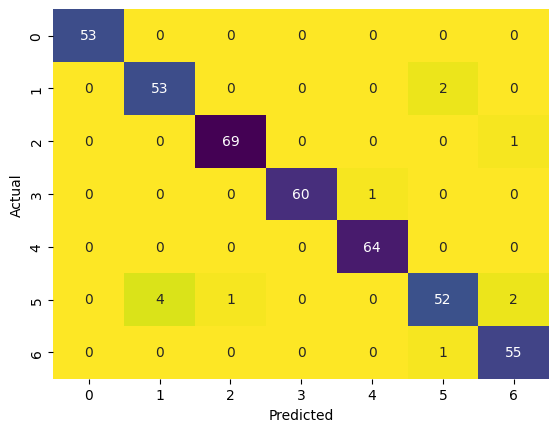

In [110]:

#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=GBC.classes_, xticklabels=GBC.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [111]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.93      0.95        57
           2       0.99      0.99      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       0.88      0.95      0.91        55
           6       0.98      0.95      0.96        58

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



C:\Users\Arpan\AppData\Local\Temp\ipykernel_28008\3718875495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
C:\Users\Arpan\AppData\Local\Temp\ipykernel_28008\3718875495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

Text(0.5, 1.0, 'Gradient Boosting')

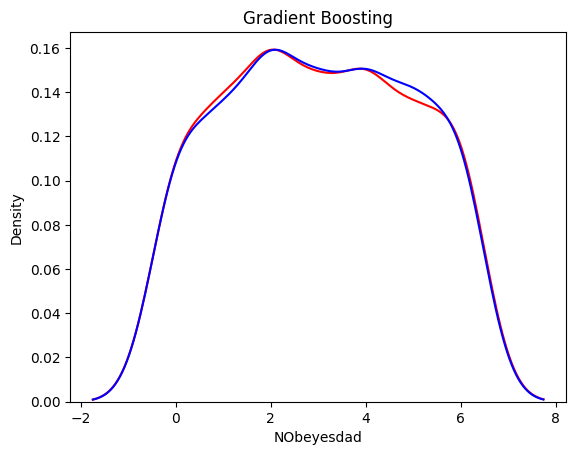

In [112]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Gradient Boosting')

In [113]:
#data2=pd.read_csv('Obesity Survey  Dataset.csv')

In [114]:
ap.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

In [115]:
datatest = pd.read_csv("Obesity Survey (Responses).csv")

In [116]:
datatest.head()

Timestamp Gender                 Email address   Age    Height  \
0   4-19-2024 3:36:54   Male      arpanmahto2003@gmail.com  22.0  1.767840   
1   4-19-2024 3:52:20   Male     krishnakanty058@gmail.com  21.0  1.737360   
2  4-19-2024 10:29:07   Male          adityam958@gmail.com  69.0  1.688592   
3  4-19-2024 10:29:45   Male  btech15064.20@bitmesra.ac.in  22.0  1.737360   
4  4-19-2024 10:30:14   Male    shivamkishor1234@gmail.com  21.0  1.737360   

   What is your height?( Numeric value in Feet and inches.EG:- 5.4)  Weight  \
0                                               5.80                   64.0   
1                                               5.70                   80.0   
2                                               5.54                   69.0   
3                                               5.70                   68.0   
4                                               5.70                   64.5   

  family_history_with_overweight FAVC  FCVC  ...       CAEC SMOKE  CH2O  SCC  \
0                             no   no     3  ...  Sometimes    no  4.00   no   
1                            yes   no     4  ...  Sometimes    no  5.00   no   
2                            yes  yes     1  ...     Always    no  1.00   no   
3                             no  yes     1  ...  Sometimes   yes  3.75   no   
4                             no   no     3  ...  Sometimes    no  3.00   no   

  FAF   TUE       CALC                 MTRANS        BMI          NObeyesdad  
0   6   8.0         no  Public_Transportation  20.478308       Normal_Weight  
1   5  10.0         no  Public_Transportation  26.503935  Overweight_Level_I  
2   7  14.0         no                Walking  24.199123       Normal_Weight  
3   4   4.0  Sometimes             Automobile  22.528344       Normal_Weight  
4   7  14.0         no                   Bike  21.368797       Normal_Weight  

[5 rows x 21 columns]

In [117]:
datatest=datatest.drop(columns=['Timestamp','Email address','What is your height?( Numeric value in Feet and inches.EG:- 5.4)','BMI'])

In [118]:
datatest.head()

Gender   Age    Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Male  22.0  1.767840    64.0                             no   no     3   
1   Male  21.0  1.737360    80.0                            yes   no     4   
2   Male  69.0  1.688592    69.0                            yes  yes     1   
3   Male  22.0  1.737360    68.0                             no  yes     1   
4   Male  21.0  1.737360    64.5                             no   no     3   

   NCP       CAEC SMOKE  CH2O SCC  FAF   TUE       CALC  \
0    4  Sometimes    no  4.00  no    6   8.0         no   
1    3  Sometimes    no  5.00  no    5  10.0         no   
2    4     Always    no  1.00  no    7  14.0         no   
3    2  Sometimes   yes  3.75  no    4   4.0  Sometimes   
4    4  Sometimes    no  3.00  no    7  14.0         no   

                  MTRANS          NObeyesdad  
0  Public_Transportation       Normal_Weight  
1  Public_Transportation  Overweight_Level_I  
2                Walking       Normal_Weight  
3             Automobile       Normal_Weight  
4                   Bike       Normal_Weight

In [119]:
datatest.duplicated().sum()

0

In [120]:
datatest.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [121]:
label_encode=LabelEncoder()
bbb=label_encode.fit_transform(datatest['Gender'])
print(bbb)
datatest['Gender']=bbb

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0]


In [122]:
bbb=label_encode.fit_transform(datatest['family_history_with_overweight'])
print(bbb)
datatest['family_history_with_overweight']=bbb


[0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [123]:
bbb=label_encode.fit_transform(datatest['FAVC'])
print(bbb)
datatest['FAVC']=bbb


[0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1]


In [124]:
bbb=label_encode.fit_transform(datatest['CAEC'])
print(bbb)
datatest['CAEC']=bbb


[2 2 0 2 2 2 2 2 1 2 2 2 0 2 2 2 1 1 2 2 2 2 3 2 2 2 1 2 2 0 2 2 3 2 2 2 3
 1 2 2 3 2 2 1 3 2 2 2 0 2 2 1 1 2 2 3 2 2 2 3 2 2 3 3 2 2 1 2 1 1 2 2 0 2
 1 1 2 0 2 2 1 2 2 1 3 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 0 2 2 1 1 2 2 2 2 2 2
 1 2 2 2 2 3 3 2 2 2 2 2 2 2 3 0 3 3 2 2 2 2 3 0 2 2 2 2 2 2 1]


In [125]:
bbb=label_encode.fit_transform(datatest['SMOKE'])
print(bbb)
datatest['SMOKE']=bbb


[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [126]:
bbb=label_encode.fit_transform(datatest['SCC'])
print(bbb)
datatest['SCC']=bbb


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0]


In [127]:
bbb=label_encode.fit_transform(datatest['CALC'])
print(bbb)
datatest['CALC']=bbb


[2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [128]:
bbb=label_encode.fit_transform(datatest['MTRANS'])
print(bbb)
datatest['MTRANS']=bbb


[3 3 4 0 1 4 1 3 4 1 4 2 3 3 1 1 2 3 2 3 4 3 4 2 1 3 4 2 3 2 1 4 3 3 3 3 2
 2 2 3 1 2 0 1 4 4 1 2 3 3 3 3 4 3 4 4 4 4 4 3 2 4 1 0 4 4 3 4 1 4 1 1 0 1
 3 1 4 4 1 1 3 3 3 2 1 1 4 2 4 3 4 1 4 4 4 2 4 2 4 2 3 4 4 4 0 4 2 1 4 3 3
 1 2 1 3 4 3 3 3 4 0 4 1 3 3 1 4 1 1 3 3 3 1 2 4 4 3 1 4 4 3 3]


In [129]:
datatest=datatest.drop(columns='NObeyesdad')

In [130]:
datatest.head()


Gender   Age    Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  22.0  1.767840    64.0                               0     0     3   
1       1  21.0  1.737360    80.0                               1     0     4   
2       1  69.0  1.688592    69.0                               1     1     1   
3       1  22.0  1.737360    68.0                               0     1     1   
4       1  21.0  1.737360    64.5                               0     0     3   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF   TUE  CALC  MTRANS  
0    4     2      0  4.00    0    6   8.0     2       3  
1    3     2      0  5.00    0    5  10.0     2       3  
2    4     0      0  1.00    0    7  14.0     2       4  
3    2     2      1  3.75    0    4   4.0     1       0  
4    4     2      0  3.00    0    7  14.0     2       1

In [131]:
input_data=datatest.iloc[0]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=GBC.predict(std_data)#model=logisticregression
print("target:",prediction)
if(prediction==0):
    print("Insufficient Weight")
elif(prediction==1):
    print("Normal weight")
elif(prediction==2):
    print("Obseity Type I")
elif(prediction==3):
    print("Obseity Type II")
elif(prediction==4):
    print("Obseity Type III")
elif(prediction==5):
    print("overweight_level I")
elif(prediction==6):
    print("overweight_level II")    

[[1.         0.17021277 0.59969811 0.18656716 0.         0.
  1.         1.         0.66666667 0.         1.5        0.
  2.         4.         0.66666667 0.75      ]]
target: [1]
Normal weight


C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [132]:
# Create an empty list to store the predictions
predictions = []

# Iterate through each row in the dataset and get the index and row data
for index, row in datatest.iterrows():
    # Convert the row data to a numpy array
    input_data_as_numpy_array = np.asarray(row)
    # Reshape the numpy array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    # Standardize the input data using the scaler
    std_data = scalers.transform(input_data_reshaped)
    # Make predictions using the Gradient Boosting Classifier
    prediction = GBC.predict(std_data)
    # Append the prediction to the list of predictions
    predictions.append((index, prediction))
# Print the predictions along with row numbers
for index, pred in predictions:
    print(f"Row {index}: ", end="")
    if pred == 0:
        print("Insufficient Weight")
    elif pred == 1:
        print("Normal weight")
    elif pred == 2:
        print("Obesity Type I")
    elif pred == 3:
        print("Obesity Type II")
    elif pred == 4:
        print("Obesity Type III")
    elif pred == 5:
        print("Overweight Level I")
    elif pred == 6:
        print("Overweight Level II")

Row 0: Normal weight
Row 1: Overweight Level II
Row 2: Overweight Level I
Row 3: Normal weight
Row 4: Normal weight
Row 5: Normal weight
Row 6: Normal weight
Row 7: Normal weight
Row 8: Insufficient Weight
Row 9: Normal weight
Row 10: Obesity Type I
Row 11: Overweight Level I
Row 12: Normal weight
Row 13: Normal weight
Row 14: Normal weight
Row 15: Normal weight
Row 16: Overweight Level I
Row 17: Normal weight
Row 18: Normal weight
Row 19: Overweight Level II
Row 20: Normal weight
Row 21: Overweight Level I
Row 22: Overweight Level I
Row 23: Overweight Level II
Row 24: Overweight Level I
Row 25: Overweight Level I
Row 26: Normal weight
Row 27: Obesity Type I
Row 28: Obesity Type I
Row 29: Normal weight
Row 30: Normal weight
Row 31: Insufficient Weight
Row 32: Overweight Level I
Row 33: Normal weight
Row 34: Obesity Type I
Row 35: Insufficient Weight
Row 36: Obesity Type I
Row 37: Normal weight
Row 38: Normal weight
Row 39: Overweight Level I
Row 40: Normal weight
Row 41: Normal weight


C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fit

# Now making a model to predict whether the person is consuming alcohol or not on the basis of his weight ,age, height, and obesity type.

In [133]:
X1=ap.drop('CALC',axis=1)

In [134]:
X1.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0       3           1  
1  3.0     2      1   3.0    1  3.0  0.0       3           1  
2  3.0     2      0   2.0    0  2.0  1.0       3           1  
3  3.0     2      0   2.0    0  2.0  0.0       4           5  
4  1.0     2      0   2.0    0  0.0  0.0       3           6

In [135]:
Y1=ap['CALC']

In [136]:
Y1

0       3
1       2
2       1
3       1
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CALC, Length: 2087, dtype: int32

## Standardization and Normalization

In [137]:
import imblearn

In [138]:
# import library

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X1, Y1)

In [139]:
X_resampled.shape, y_resampled.shape

((5520, 16), (5520,))

In [140]:
X1,Y1=X_resampled, y_resampled

In [141]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xt=scalers.fit_transform(X1)

In [142]:
Xt

array([[0.        , 0.14893617, 0.32075472, ..., 0.5       , 0.75      ,
        0.16666667],
       [0.        , 0.14893617, 0.13207547, ..., 0.        , 0.75      ,
        0.16666667],
       [1.        , 0.19148936, 0.66037736, ..., 0.5       , 0.75      ,
        0.16666667],
       ...,
       [1.        , 0.49521911, 0.55859434, ..., 0.336704  , 0.        ,
        1.        ],
       [1.        , 0.34714434, 0.47465283, ..., 0.2068315 , 0.75      ,
        0.5       ],
       [0.        , 0.17152045, 0.28301887, ..., 0.6405705 , 0.75      ,
        0.33333333]])

In [143]:
Y1.value_counts().head(50)

CALC
3    1380
2    1380
1    1380
0    1380
Name: count, dtype: int64

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(Xt,Y1,test_size=0.2,random_state=42,stratify=Y1)

In [145]:
X.shape,X_train.shape,X_test.shape

((2087, 16), (4416, 16), (1104, 16))

In [146]:
Y.shape,Y_train.shape,Y_test.shape

((2087,), (4416,), (1104,))

### Model selection

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.6938
testingAccuracy: 0.6721


Logistic Regression:
trainAccuracy: 0.6981
testingAccuracy: 0.6821


Naive Bayes:
trainAccuracy: 0.6488
testingAccuracy: 0.6495




C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine:
trainAccuracy: 0.8879
testingAccuracy: 0.8596


K-Nearest Neighbors:
trainAccuracy: 0.9457
testingAccuracy: 0.9212


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9511


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9601


Bagging:
trainAccuracy: 0.9973
testingAccuracy: 0.9520


AdaBoost:
trainAccuracy: 0.4885
testingAccuracy: 0.4783


Gradient Boosting:
trainAccuracy: 0.9459
testingAccuracy: 0.9239


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.9511




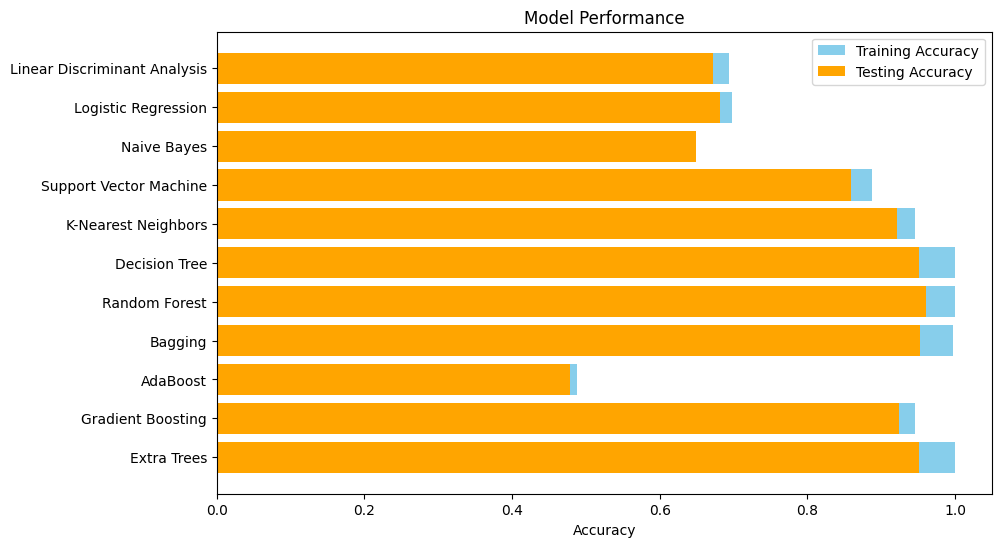

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()
# print("TRAINING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     X_train_prediction = model.predict(X_train)
#     trainacc = accuracy_score( X_train_prediction, Y_train)
#     print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
# #for testing  data  
# print("TESTING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     testacc = accuracy_score(Y_test, y_pred)
#     print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

In [148]:
#The best testing accuracy is provided by Random Forest Classifier
model=RandomForestClassifier()
rfc=model.fit(X_train,Y_train)

In [149]:
X_train_prediction=rfc.predict(X_train).round()
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [150]:
print(X_train_prediction)

[2 2 2 ... 1 0 0]


In [151]:
print(training_data_accuracy)

1.0


In [152]:
X_test_prediction=rfc.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9583333333333334


In [153]:
from sklearn import metrics
# Print the confusion matrix
metrics.confusion_matrix(Y_test, X_test_prediction)

array([[276,   0,   0,   0],
       [  0, 276,   0,   0],
       [  0,   0, 240,  36],
       [  0,   0,  10, 266]], dtype=int64)

In [154]:
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       276
           2       0.96      0.87      0.91       276
           3       0.88      0.96      0.92       276

    accuracy                           0.96      1104
   macro avg       0.96      0.96      0.96      1104
weighted avg       0.96      0.96      0.96      1104



C:\Users\Arpan\AppData\Local\Temp\ipykernel_28008\1431417699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")


Text(0.5, 0, 'Alcohol Consumption')

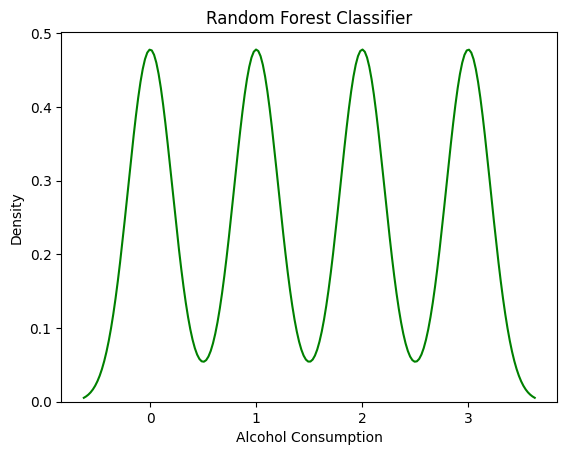

In [155]:
sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")
plt.title('Random Forest Classifier')
plt.xlabel('Alcohol Consumption')

In [156]:
input_data=X1.iloc[4]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=rfc.predict(std_data)#model=logisticregression
print("target:",prediction)
if(prediction==0):
    print("Always")
elif(prediction==1):
    print("Frequently")
elif(prediction==2):
    print("Sometimes")
elif(prediction==3):
    print("No")
    

[[1.         0.17021277 0.62264151 0.37910448 0.         0.
  0.5        0.         0.66666667 0.         0.5        0.
  0.         0.         0.75       1.        ]]
target: [2]
Sometimes


C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [157]:
Y1.head(10)

0    3
1    2
2    1
3    1
4    2
5    2
6    2
7    2
8    1
9    3
Name: CALC, dtype: int32

In [158]:
ap.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

# Now making a model for predicting whether the person smokes or not

In [159]:
X2=ap.drop('SMOKE',axis=1)

In [160]:
X2.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2   2.0    0  0.0  1.0     3       3           1  
1  3.0     2   3.0    1  3.0  0.0     2       3           1  
2  3.0     2   2.0    0  2.0  1.0     1       3           1  
3  3.0     2   2.0    0  2.0  0.0     1       4           5  
4  1.0     2   2.0    0  0.0  0.0     2       3           6

In [161]:
Y2=ap['SMOKE']

In [162]:
Y2.value_counts().head(50)

SMOKE
0    2043
1      44
Name: count, dtype: int64

## standardization and normalization

In [163]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xt=scalers.fit_transform(X2)

In [164]:
Xt

array([[0.        , 0.14893617, 0.32075472, ..., 1.        , 0.75      ,
        0.16666667],
       [0.        , 0.14893617, 0.13207547, ..., 0.66666667, 0.75      ,
        0.16666667],
       [1.        , 0.19148936, 0.66037736, ..., 0.33333333, 0.75      ,
        0.16666667],
       ...,
       [0.        , 0.18136247, 0.5702    , ..., 0.66666667, 0.75      ,
        0.66666667],
       [0.        , 0.22046672, 0.54613208, ..., 0.66666667, 0.75      ,
        0.66666667],
       [0.        , 0.20563211, 0.54497358, ..., 0.66666667, 0.75      ,
        0.66666667]])

In [165]:
X_train,X_test,Y_train,Y_test=train_test_split(Xt,Y2,test_size=0.2,random_state=42,stratify=Y2)

In [166]:
X.shape,X_train.shape,X_test.shape

((2087, 16), (1669, 16), (418, 16))

In [167]:
Y.shape,Y_train.shape,Y_test.shape

((2087,), (1669,), (418,))

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.9760
testingAccuracy: 0.9761


Logistic Regression:
trainAccuracy: 0.9790
testingAccuracy: 0.9785


Naive Bayes:
trainAccuracy: 0.9473
testingAccuracy: 0.9498


Support Vector Machine:
trainAccuracy: 0.9790
testingAccuracy: 0.9785


K-Nearest Neighbors:
trainAccuracy: 0.9814
testingAccuracy: 0.9761


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9593


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9761


Bagging:
trainAccuracy: 0.9964
testingAccuracy: 0.9761


AdaBoost:
trainAccuracy: 0.9856
testingAccuracy: 0.9713


Gradient Boosting:
trainAccuracy: 0.9970
testingAccuracy: 0.9737


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.9689




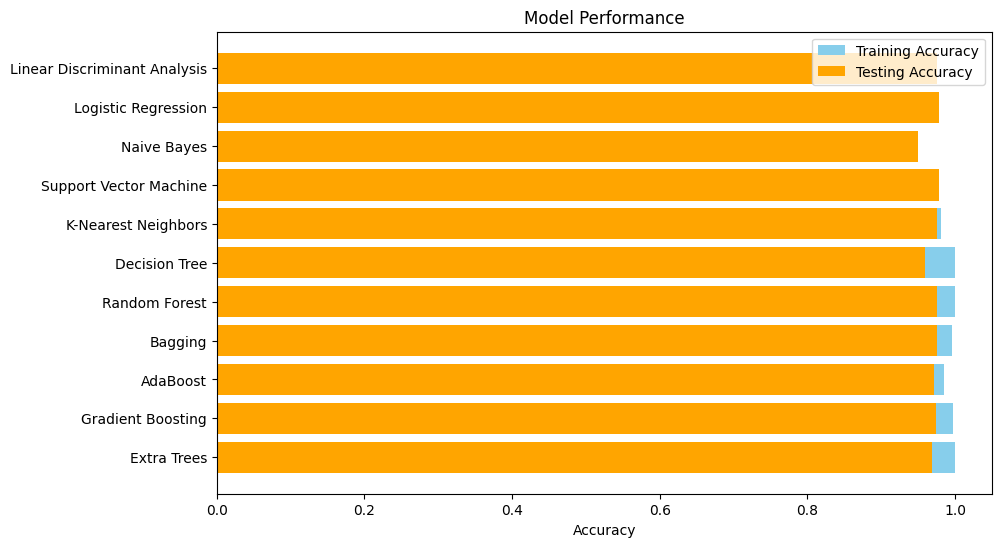

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()
# print("TRAINING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     X_train_prediction = model.predict(X_train)
#     trainacc = accuracy_score( X_train_prediction, Y_train)
#     print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
# #for testing  data  
# print("TESTING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     testacc = accuracy_score(Y_test, y_pred)
#     print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

In [169]:
input_data=X2.iloc[3]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=rfc.predict(std_data)
print("target:",prediction)
if(prediction==0):
    print("NO")
elif(prediction==1):
    print("Yes")


[[1.         0.27659574 0.66037736 0.35820896 0.         0.
  1.         0.66666667 0.66666667 0.5        0.         0.66666667
  0.         0.33333333 1.         0.83333333]]
target: [2]


C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [170]:
Y2.head()

0    0
1    1
2    0
3    0
4    0
Name: SMOKE, dtype: int32

In [171]:
model2=RandomForestClassifier()
rfc1=model2.fit(X_train,Y_train)

In [172]:
X_train_prediction=rfc1.predict(X_train).round()
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [173]:
print(X_train_prediction)

[0 0 0 ... 0 0 0]


In [174]:
print(training_data_accuracy)

1.0


In [175]:
X_test_prediction=rfc1.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9736842105263158


In [176]:
from sklearn import metrics
# Print the confusion matrix
metrics.confusion_matrix(Y_test, X_test_prediction)

array([[407,   2],
       [  9,   0]], dtype=int64)

In [177]:
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       0.00      0.00      0.00         9

    accuracy                           0.97       418
   macro avg       0.49      0.50      0.49       418
weighted avg       0.96      0.97      0.97       418



C:\Users\Arpan\AppData\Local\Temp\ipykernel_28008\1485988627.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")


Text(0.5, 0, 'Smoking Status')

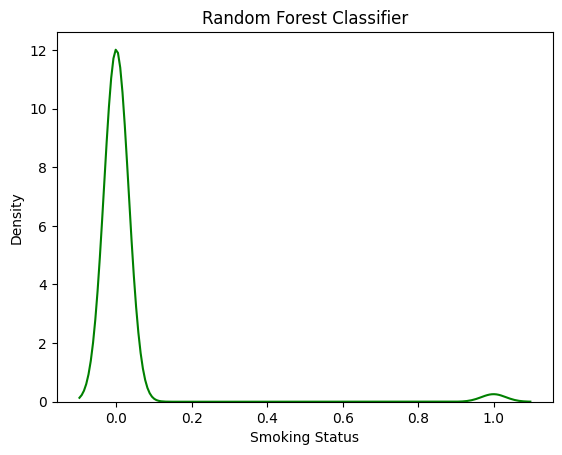

In [178]:
sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")
plt.title('Random Forest Classifier')
plt.xlabel('Smoking Status')

In [179]:
input_data=X2.iloc[0]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=rfc1.predict(std_data)
print("target:",prediction)
if(prediction==0):
    print("NO")
elif(prediction==1):
    print("Yes")

[[0.         0.14893617 0.32075472 0.18656716 1.         0.
  0.5        0.66666667 0.66666667 0.5        0.         0.
  0.5        1.         0.75       0.16666667]]
target: [0]
NO


C:\Users\Arpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [180]:
Y2.head()

0    0
1    1
2    0
3    0
4    0
Name: SMOKE, dtype: int32